<a href="https://colab.research.google.com/github/sidds4474/Mobile-Price-Range-Classification-ML/blob/main/Mobile_Price_Range_Classification_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Mobile Price Range Classification </u></b>

## *Problem Description : In this competitive market compnaies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of mobile phone(eg. RAM, Internal Memory, etc.) and its selling price. In this problem, we don have to predict price but a price range indicating how hiight the price is.*

# Attributes in this data:

**id**: ID

**battery_power**: Total energy a battery can store in one time measured in mAh

**blue**: Has bluetooth or not

**clock_speed**: speed at which microprocessor executes instructions

**dual_sim**: Has dual sim support or not
fc:Front Camera mega pixels

**four_g**: Has 4G or not

**int_memory**: Internal Memory in Gigabytes
m_dep:Mobile Depth in cm

**mobile_wt**: Weight of mobile phone

**n_cores**: Number of cores of processor

**pc**: Primary Camera mega pixels

**px_height**: Pixel Resolution Height

**px_width**: Pixel Resolution Width

**ram**: Random Access Memory in Megabytes

**sc_h**: Screen Height of mobile in cm

**sc_w**: Screen Width of mobile in cm

**talk_time**: Longest time that a single battery charge will last when you are

**three_g**: Has 3G or not

**touch_screen**: Has touch screen or not

**wifi**: Has wifi or not

**Price_range** : This is the target variable with value of

0(low cost),
1(medium cost),
2(high cost) and
3(very high cost).

Thus our target variable has 4 categories so basically it is a Multiclass classification problem.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 999
import seaborn as sns
# setting font weight,label weight,title weight to bold and setting title size,label size,fontsize.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

In [2]:
# Mounting the google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading the data file

data = pd.read_csv('/content/drive/MyDrive/Mobile Price Range Prediction - Capstone Project/data_mobile_price_range.csv',encoding = 'latin' )

In [4]:
data.head(-5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,1617,1,2.4,0,8,1,36,0.8,85,1,9,743,1426,296,5,3,7,1,0,0,0
1991,1882,0,2.0,0,11,1,44,0.8,113,8,19,4,743,3579,19,8,20,1,1,0,3
1992,674,1,2.9,1,1,0,21,0.2,198,3,4,576,1809,1180,6,3,4,1,1,1,0
1993,1467,1,0.5,0,0,0,18,0.6,122,5,0,888,1099,3962,15,11,5,1,1,1,3


In [5]:
# Learning about the rows and colums

print(data.shape)
print(f'Total Rows = {data.shape[0]}\nTotol Columns = {data.shape[1]} ')

(2000, 21)
Total Rows = 2000
Totol Columns = 21 


In [6]:
# Getting all the columns name
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [7]:
# Checking the datatypes, non null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

*   We don't have any object data type in our data set.Also we have Zero null values in data set.

* Price_range is our target variable.



In [8]:
# Unique values
data.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [9]:
# Checking Null values
data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

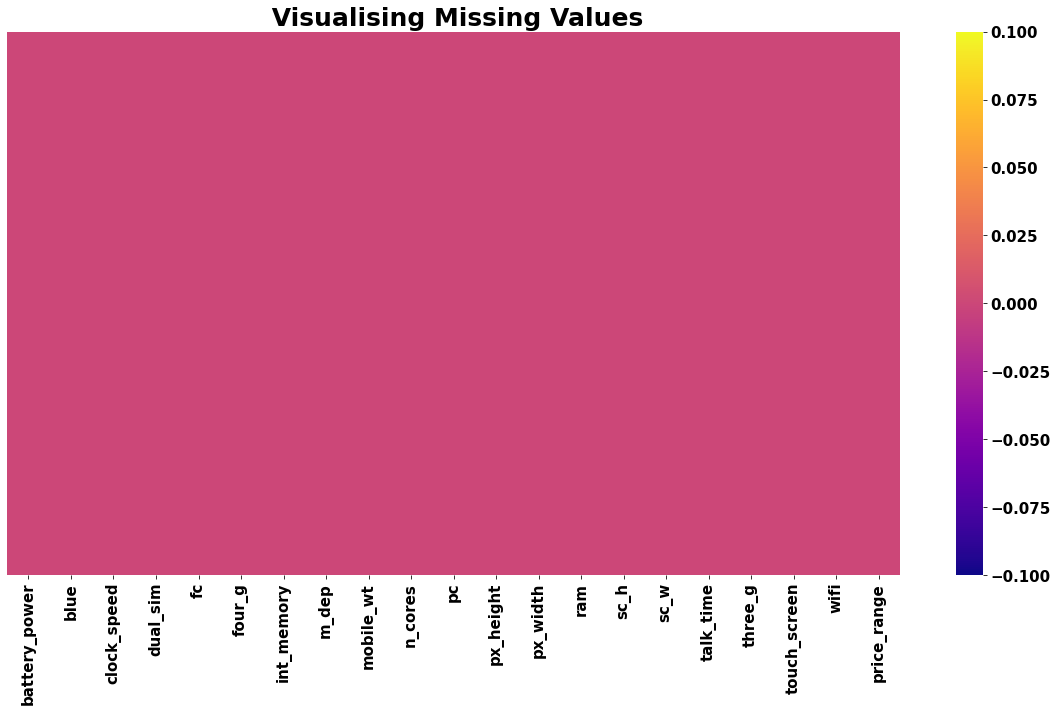

In [10]:
# Visulaizing null values using heatmap.
plt.figure(figsize=(20,10))
sns.heatmap(data.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")
plt.show()

No Null values found which is good thing for us.

In [11]:
# Checking Statistic of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


Some Basic Observations:

We can see that sc_width and px_height has minimum value 0. which is not possible in any mobile. We need to handle this mismatch.

In [12]:
# Checking How many observations having screen width value as 0.
print(data[data['sc_w']==0].shape[0])

180


In [13]:
# Checking How many observations having px_hieght value as 0.
print(data[data['px_height']==0].shape[0])

2


In [14]:
# As there are only 2 observations having px_height=0. so we will drop it.
mobile_data=data[data['px_height']!=0]

Nearest Neighbors Imputations (KNNImputer)
Missing values are imputed using the k-Nearest Neighbors approach where a Euclidean distance is used to find the nearest neighbors.

Before using KNN Imputer we need to replace 0 with NAN values. so that it will work.

In [15]:
# Replacing 0 with NAN so that we can implement KNN Imputer.
data['sc_w'] = data['sc_w'].replace(0,np.nan)

In [16]:
# import KNN imputer frio sklearn
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=1)
data=pd.DataFrame(impute_knn.fit_transform(data),columns=data.columns)

In [17]:
# Checking shape
mobile_data.shape

(1998, 21)

In [18]:
# Checking How many observations having sc_w value as 0.
data[data['sc_w']==0].shape[0]

0

Thus we have handled the mismatched values of the data.

## **EXPLORATORY DATA ANALYSIS**

In [19]:
# lets have look at our target variable's counts
price_range_values=data['price_range'].value_counts()
price_range_values

1.0    500
2.0    500
3.0    500
0.0    500
Name: price_range, dtype: int64

We have almost equal number of obseravtions for each category. Thus we don't have imbalanced target variable. Accuracy score will be the best evalaution metric for us to select the model.

This is the target variable with value of

0=low cost,
1=medium cost,
2=high cost,
3=very high cost.

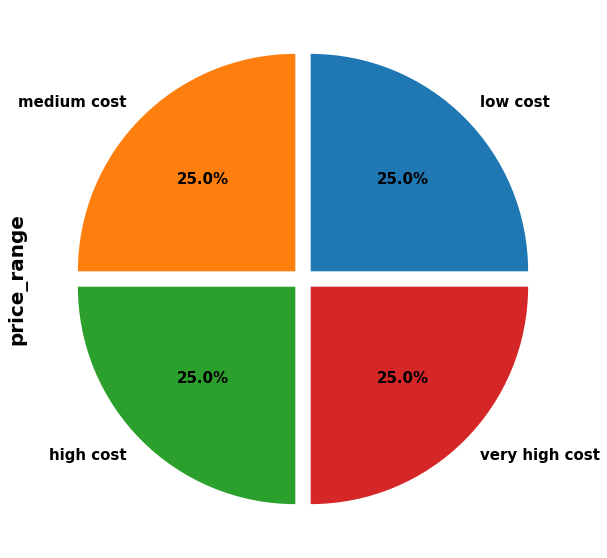

In [20]:
# Visualizing the Target variable's class distribution.
labels = ["low cost", "medium cost", "high cost", "very high cost"]
price_range_values.plot.pie(explode=[0.05]*4,labels=labels,autopct='%1.1f%%',figsize=(20,10),fontsize=15)    # plotting pie chart
plt.show()

We can see that our target varibale is equally distributed.
Thus we don't have to worry about data imbalance as there is no need of oversampling or undersampling which is good for us.

### **Correlation of target varaible i.e Dependent variable with the other independent variable.**

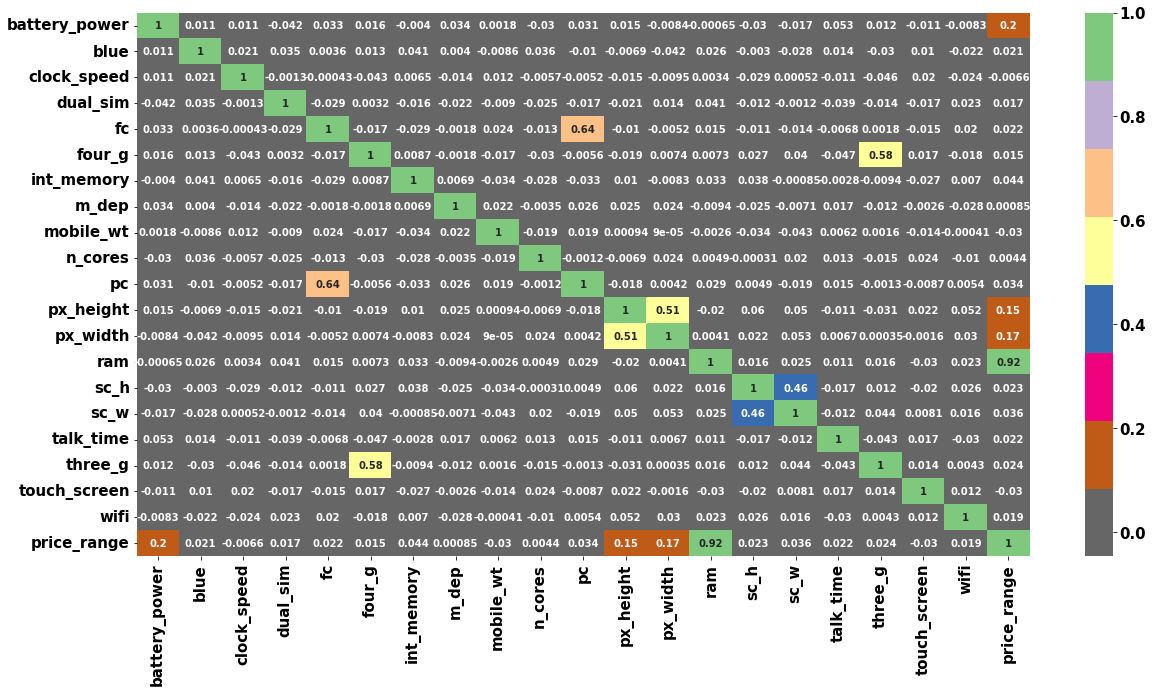

In [21]:
corr= data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True, cmap=plt.cm.Accent_r)
plt.show()

Observations:
*   RAM has strong positive correlation with the Price_range. and we know that Mobiles with high RAM are very costly. Thus RAM increases price range also increase.

*   Battery_power also has positive correlation with the price range.Generally mobiles having high prices comes with good battery power.

*   Also px_height and px_width (Pixel Resolution Height and width) are positively correlated. Generally High price range mobiles have good resolutions.

*   Four_g and Three_g are highly positvely correlated. Nowdays most of the smart mobiles has both type of options. This could be the reason that they are correlated.

* Primary camera i.e pc and front camera fc are positively correlated, sc_h and sc_w are positively correlated.




## Univariate Analysis of Categorical columns.

In [22]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

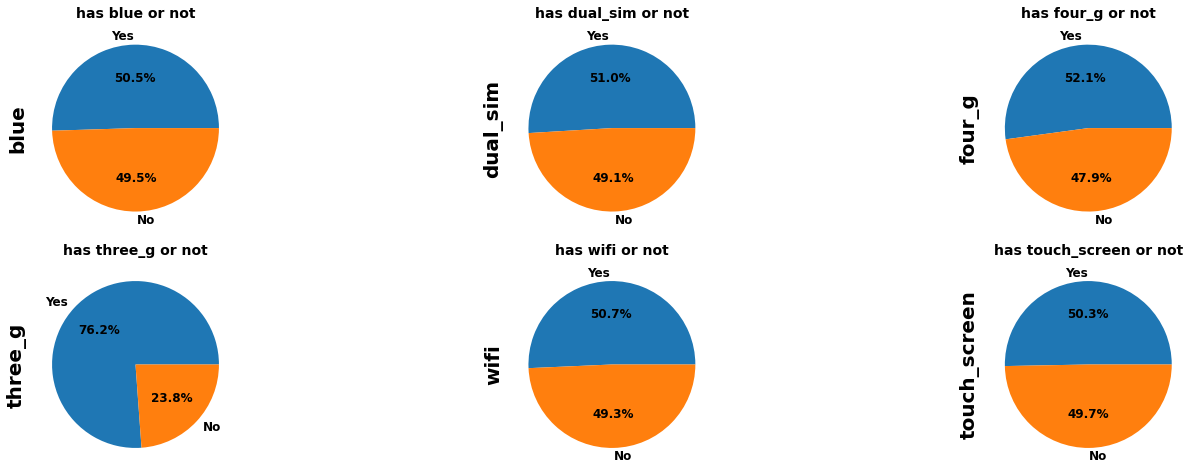

In [23]:
# Plotting the piecharts for binary categorical variables.
plt.figure(figsize=(20,10))

rows=3
col=3
count=1
var_list=['blue','dual_sim','four_g','three_g','wifi','touch_screen']
labels=['Yes','No']

for var in var_list:
  plt.subplot(rows,col,count)
  data[var].value_counts().plot.pie(autopct='%1.1f%%',fontsize=12,labels=labels)
  plt.title(f'has {var} or not',fontsize=14)
  plt.tight_layout()
  count=count+1

1 means it has the specifications.

0 means it do not have the specifications.

Percentage Distribution of Mobiles having bluetooth,dual sim, 4G,wifi and touchscreen are almost 50 %.

very few mobiles(23.8%) do not have Three_g.

## Relation Between RAM,Battery_power,px_height and px_width

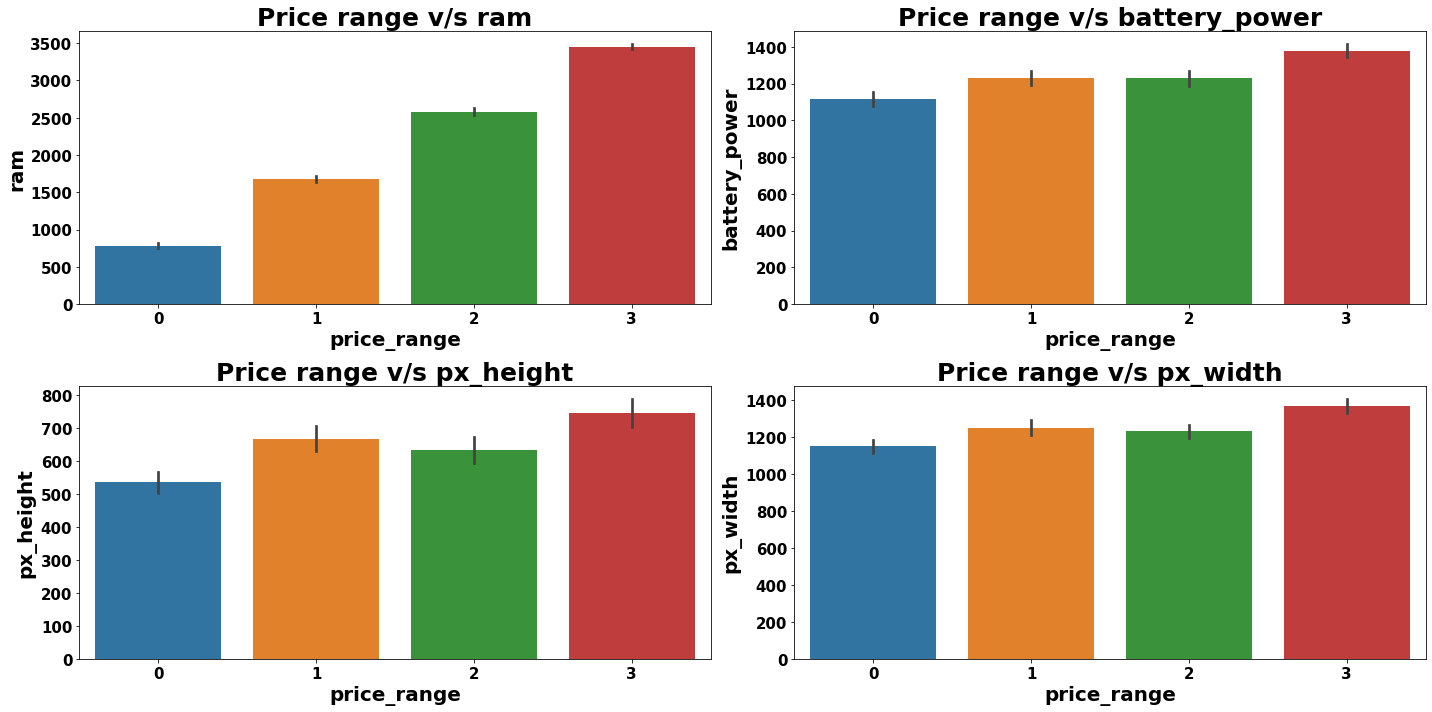

In [24]:
# plotting  price_range vs other fearures
plt.figure(figsize=(20,10))

labels=['0=low_cost','1=medium_cost','2=high_cost','3=very_high_cost']

rows=2   
cols=2
counter=1

variables=['ram','battery_power','px_height','px_width']

for var in variables:
  plt.subplot(rows,cols,counter)
  sns.barplot(x=mobile_data['price_range'],y=mobile_data[var])
  plt.title(f'Price range v/s {var}')
  counter=counter+1
  plt.tight_layout()

In [25]:
# Checking the counts of binary categorical variables by grouping price range.
grup_by_price=mobile_data.groupby(['price_range']).agg({'blue':'value_counts','dual_sim':'value_counts','four_g':'value_counts','three_g':'value_counts','touch_screen':'value_counts','wifi':'value_counts'}).unstack()

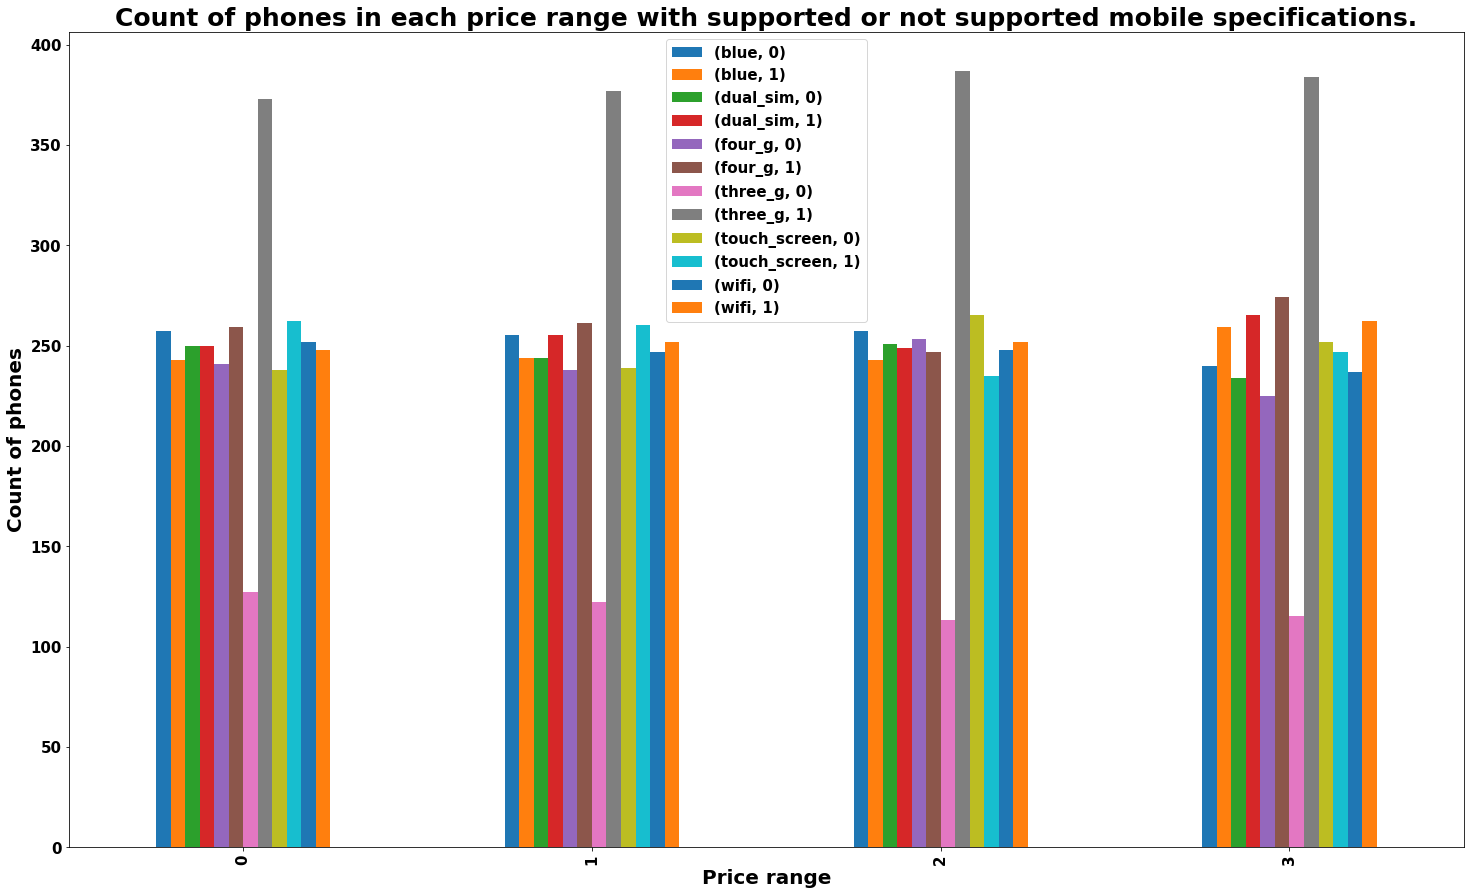

In [26]:
# visualising by plotting barchat.
# plt.figure(figsize=(12,6))
grup_by_price.plot.bar(figsize=(25,15))
plt.title('Count of phones in each price range with supported or not supported mobile specifications.')
plt.xlabel('Price range')
plt.ylabel('Count of phones')
plt.legend(loc='upper center')

Observation:

We can see that each price range category has equal number of mobiles phones having both supporting and non supporting specifications.

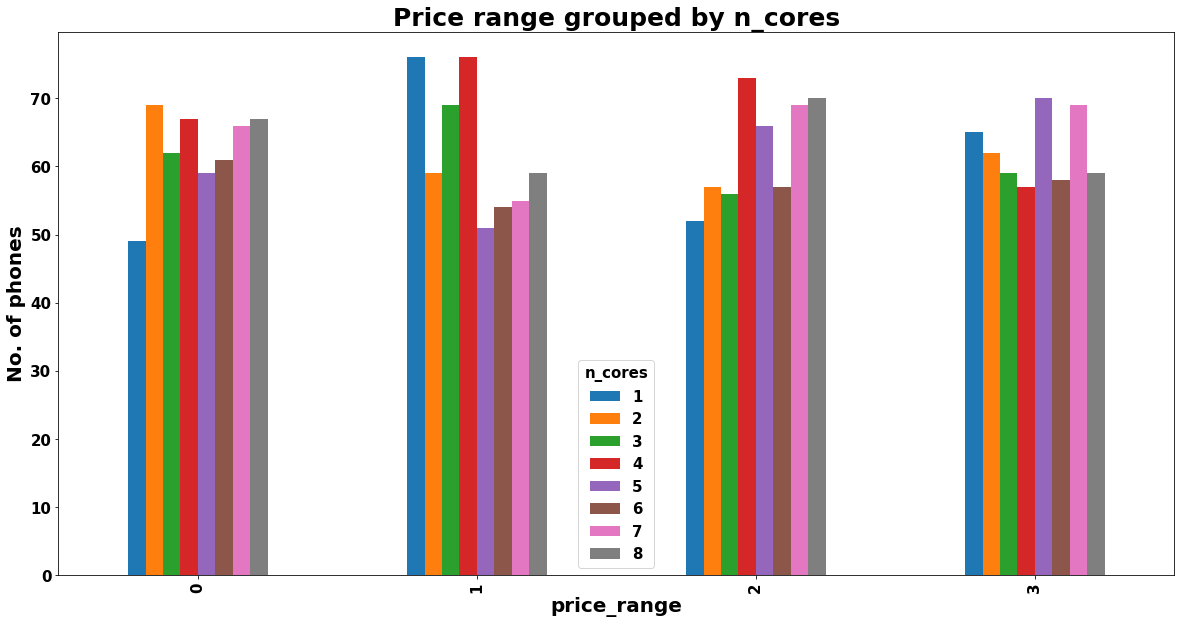

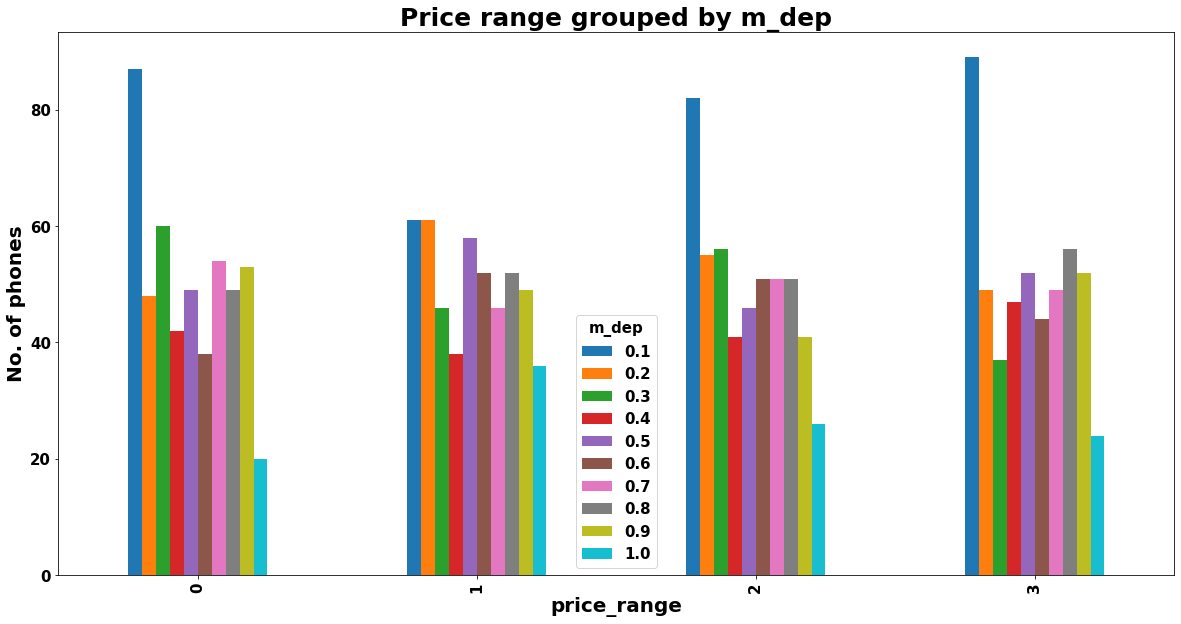

In [27]:
list_2=['n_cores','m_dep']
for item in list_2:
  
  mobile_data.groupby(['price_range'])[item].value_counts().unstack().plot.bar(figsize=(20,10))
  plt.title(f'Price range grouped by {item}')
  plt.ylabel('No. of phones')

Observations:

There are very few mobiles in price range 0 and 1 with lesser no of cores.

Most of the mobiles in price range 2 and 3 are with high no of cores.

Number of phones with less thickness is high and count of phones with high thickness is low.

## Let's Check which numerical feature is driving the price range most.

In [28]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

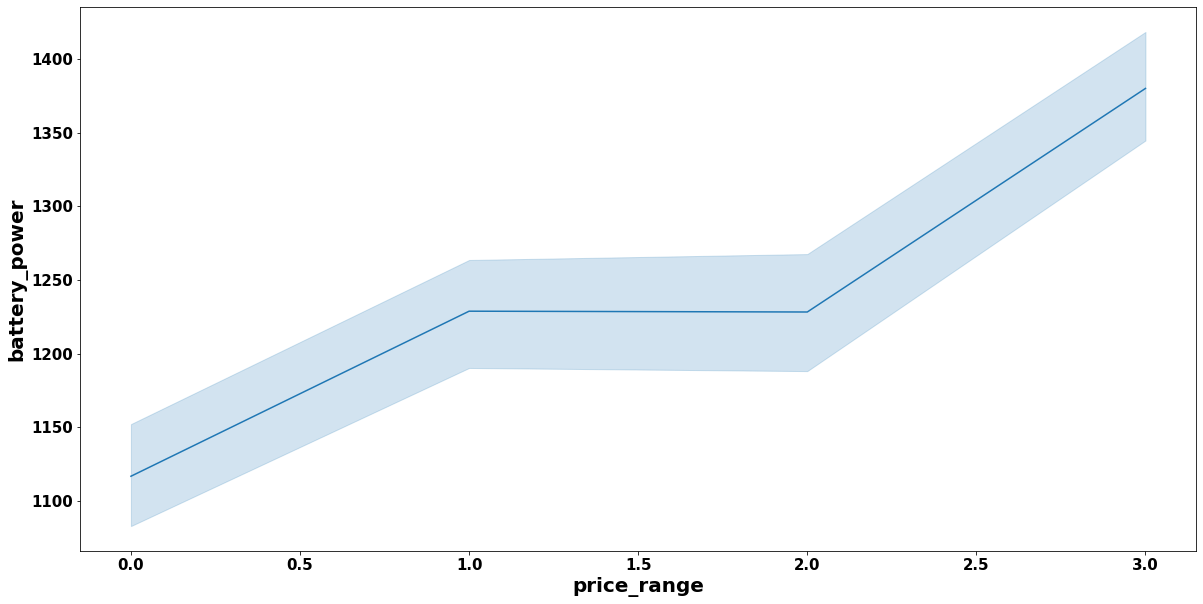

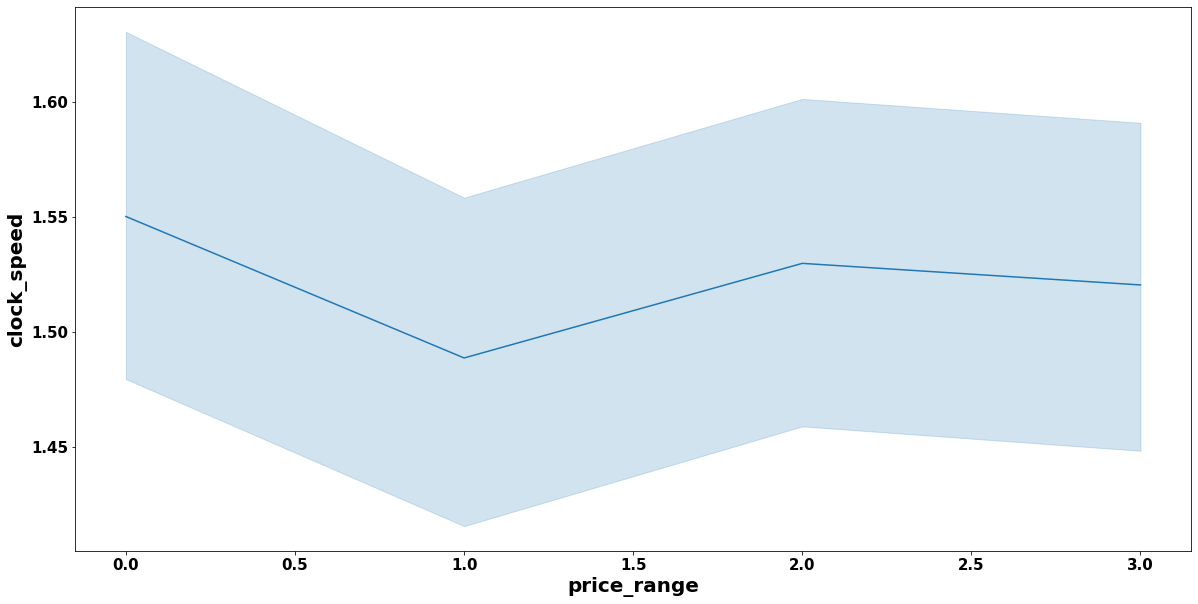

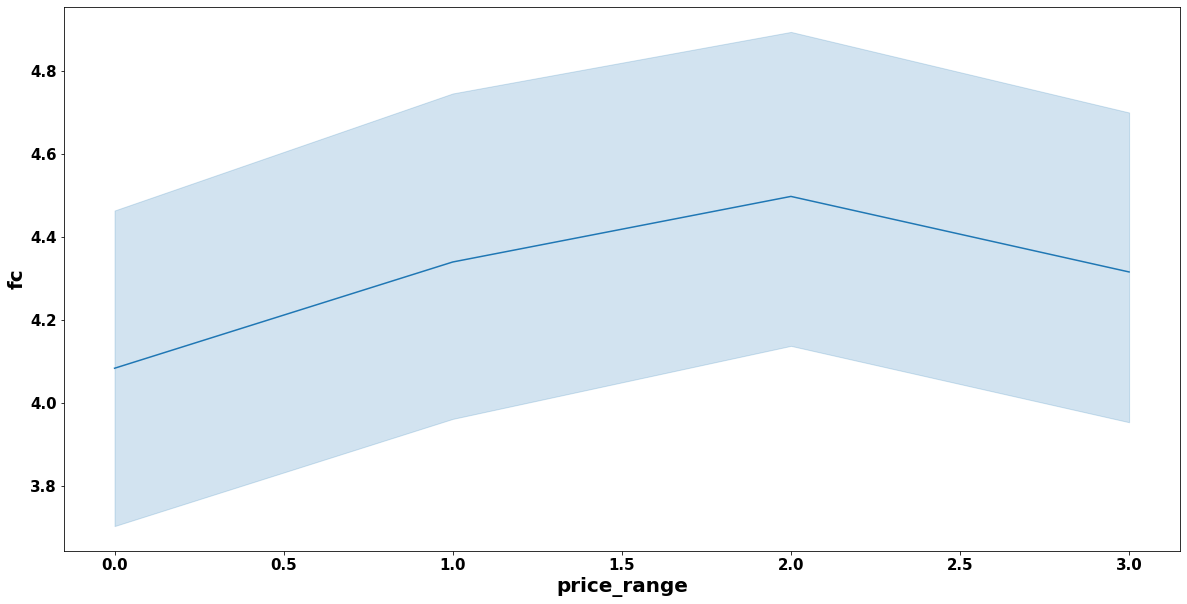

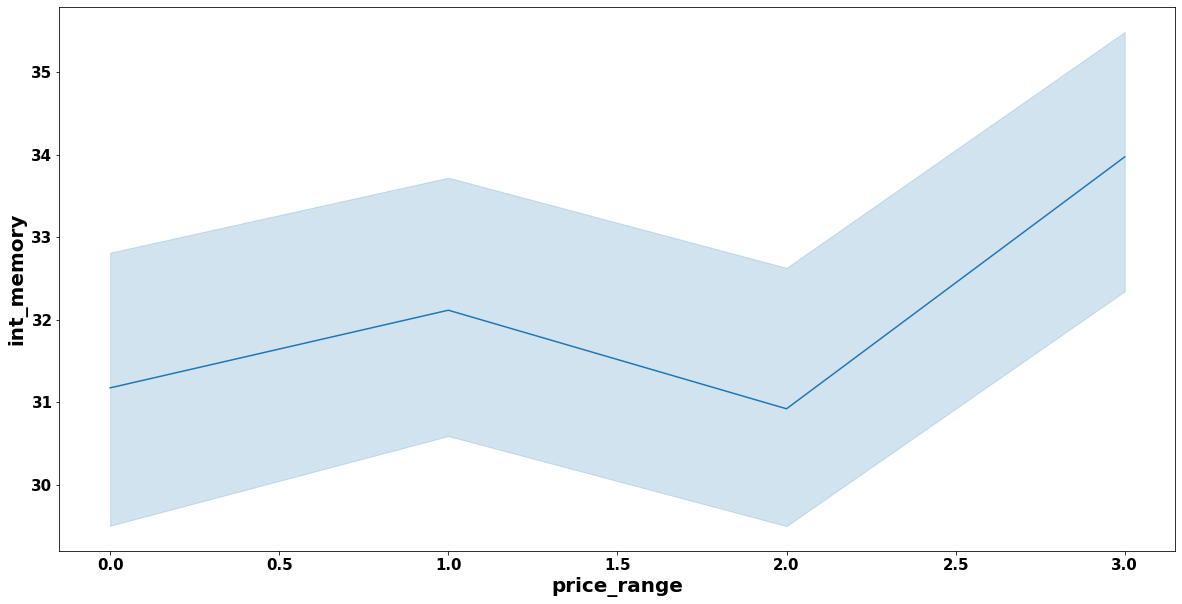

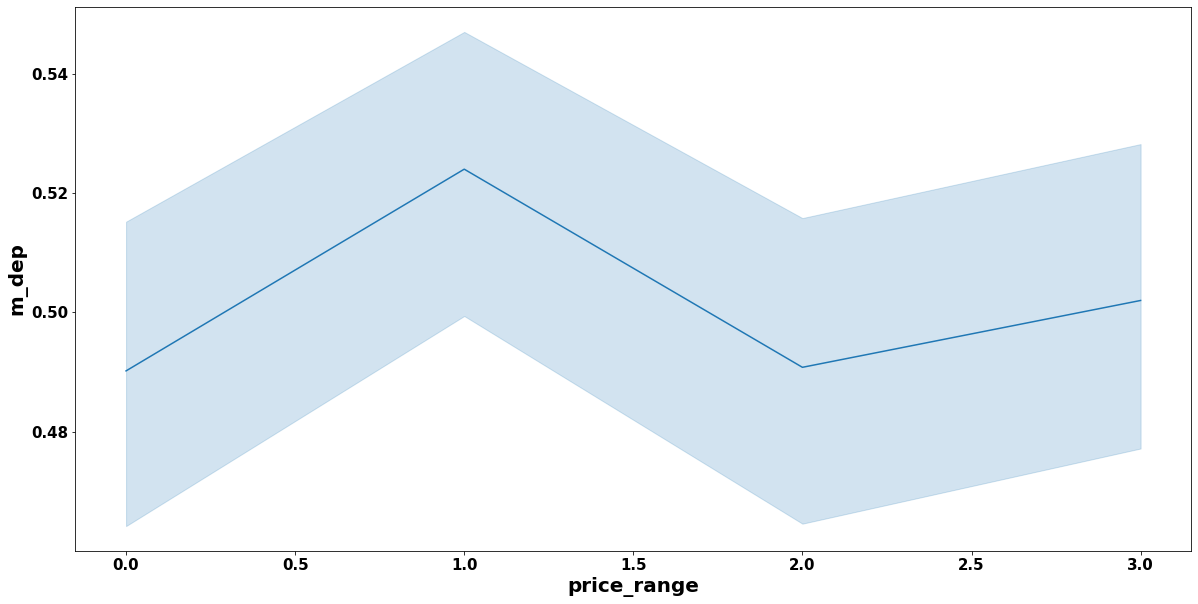

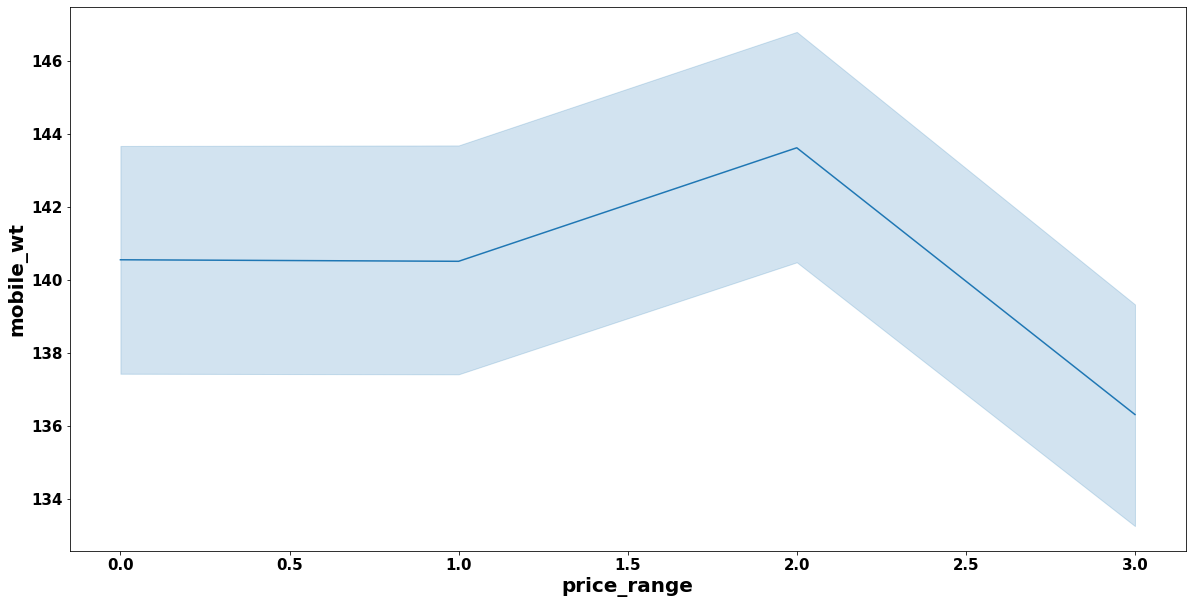

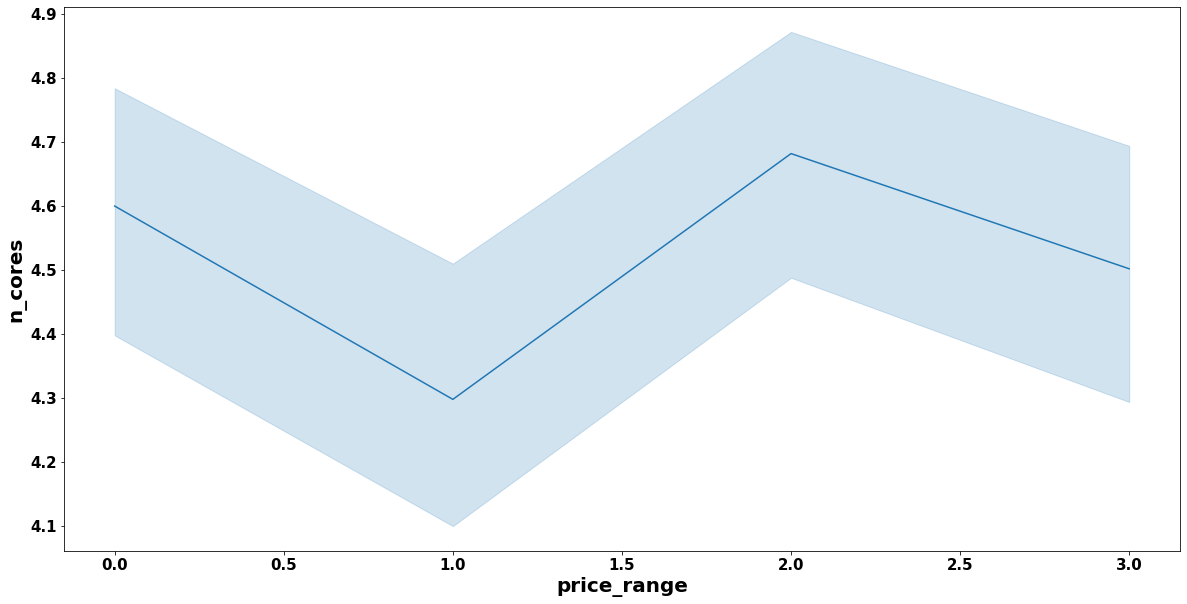

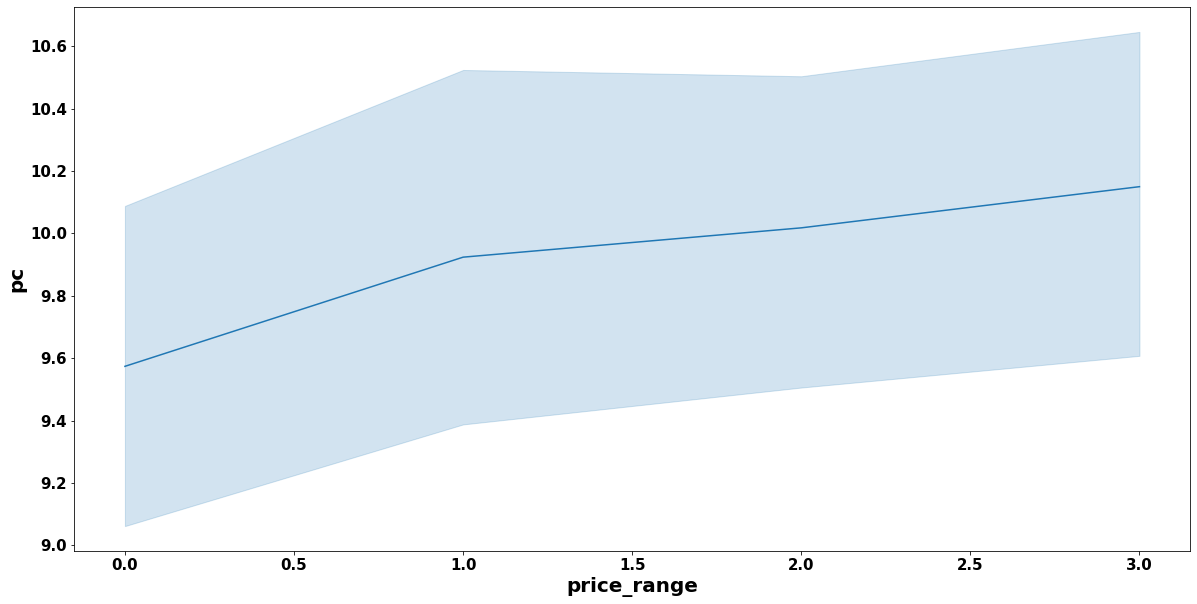

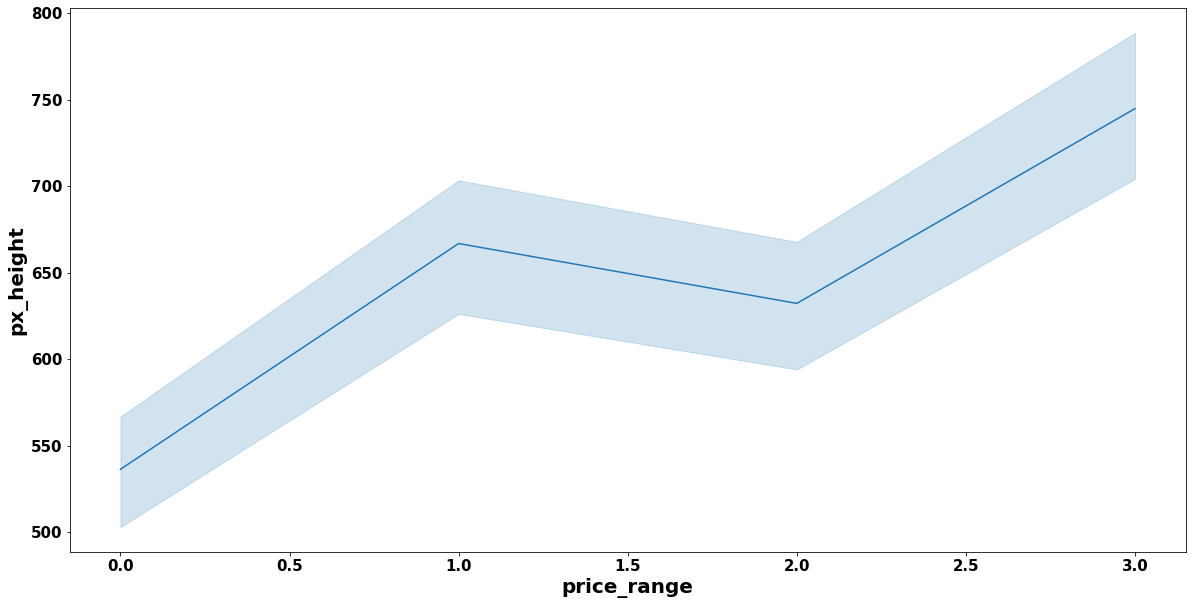

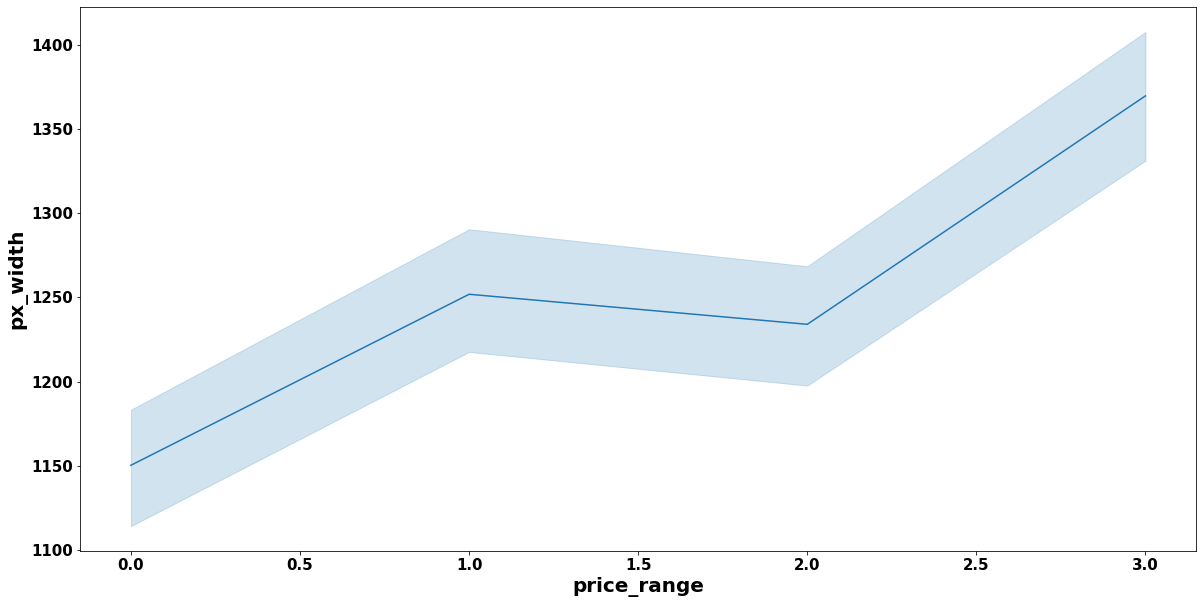

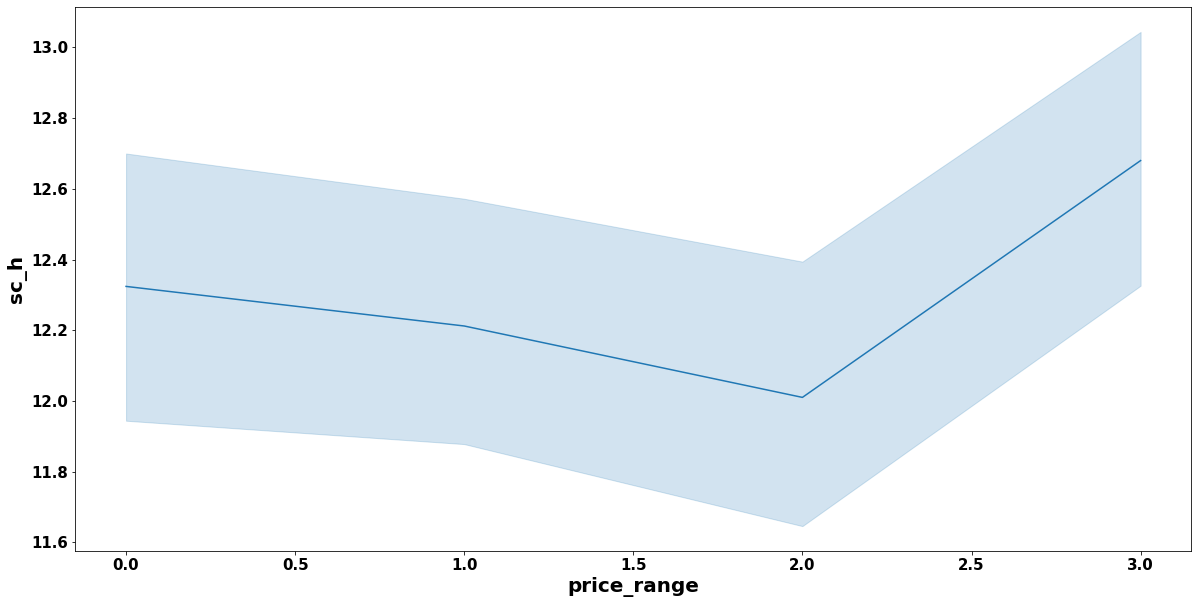

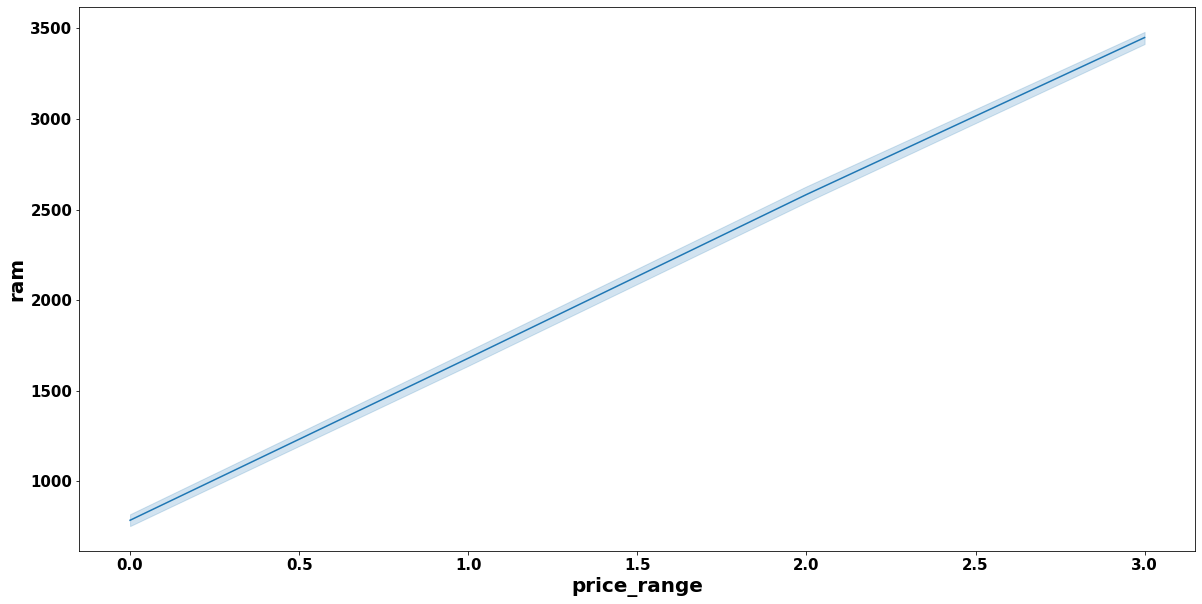

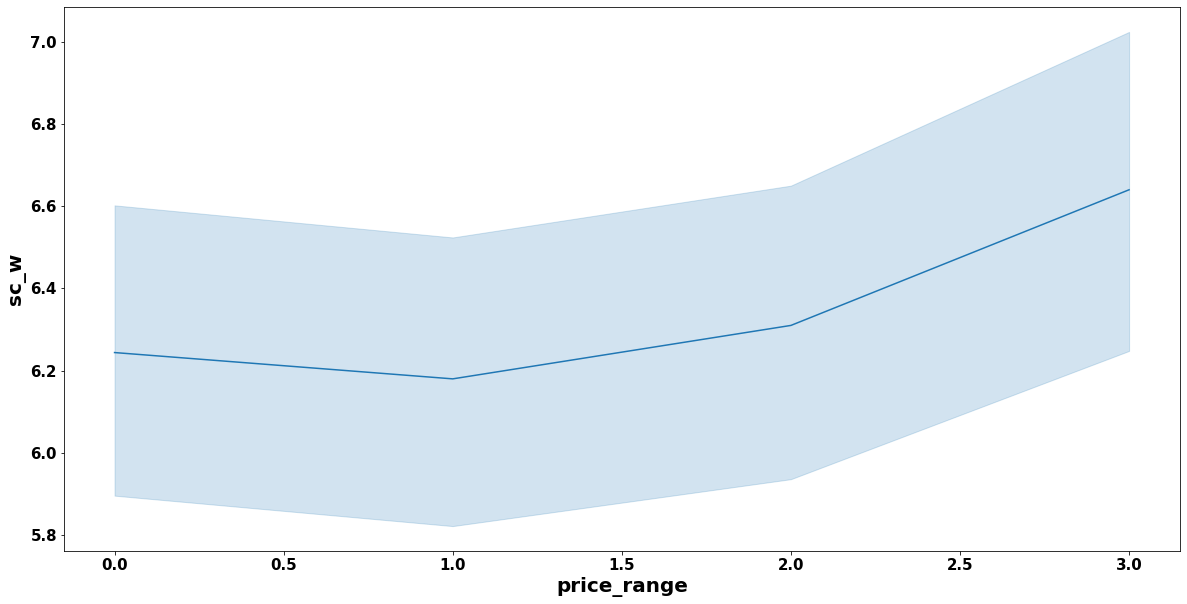

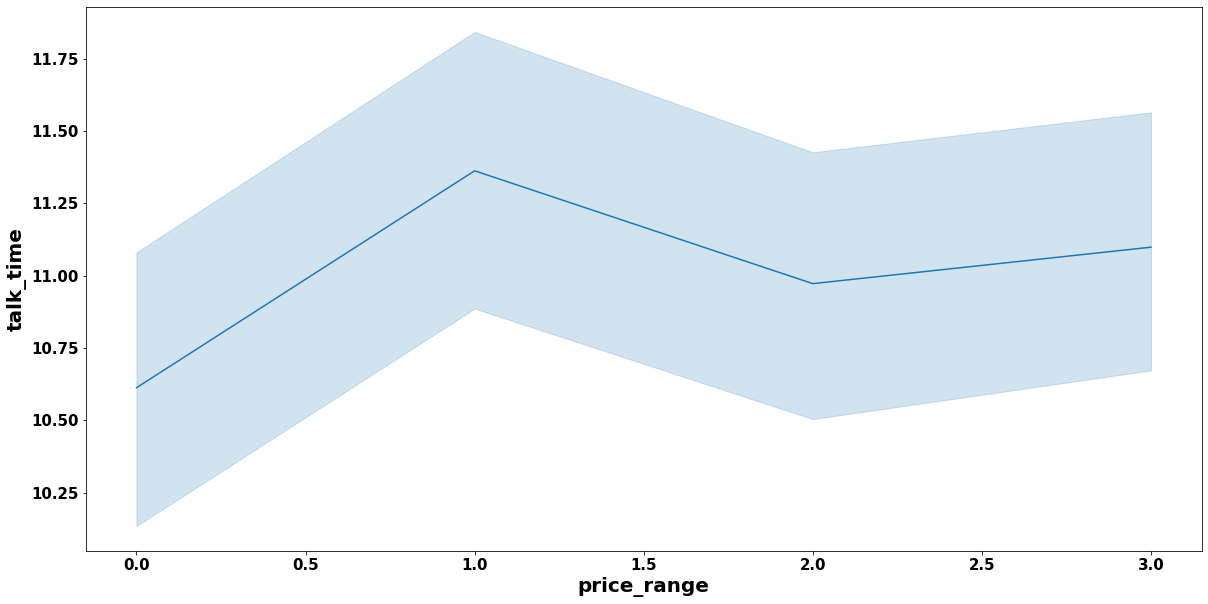

In [29]:
list_1=['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','sc_h','ram','sc_w','talk_time']
# plotting boXplot and distribution
counter=1
for var in list_1:
    plt.figure(figsize=(20,10))
    
    sns.lineplot(x=data['price_range'],y=data[var])

Observations :

For class 1 and class2 battery power range is almost similar. As battery power increases price also increases whcih is quite obivious.

Mobiles in very high price range(Class 3) has less weight compared to other classes.That means as weight of mobiles decrease price increases.

Mobiles having max screen height and width falls in very high price category. We can see in linechart of sc_width and sc_height from class 2 screen width and hieght starts increasing with price. 

Similar case is with px_height and px_width. As resolution of screen increases the price also increases

RAM has clear relationship with price range we saw that in correlation matrix also.

## Mobiles with both 3G and 4G.

In [30]:
# Mobiles have both 3G and 4G specifications.
three_g_and_4g_df=data[(data['three_g']==1) & (data['four_g']==1)]

In [31]:
three_g_and_4g_df['price_range'].value_counts()

3.0    275
1.0    262
0.0    259
2.0    247
Name: price_range, dtype: int64

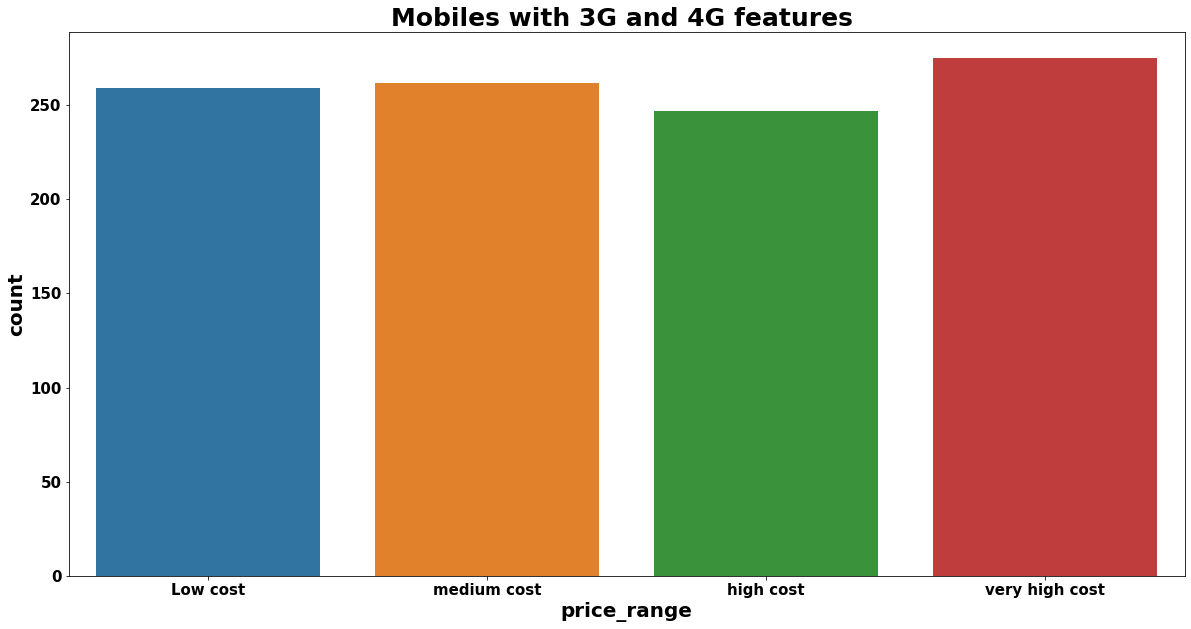

In [32]:
plt.figure(figsize=(20,10))
sns.countplot(three_g_and_4g_df['price_range'])
plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
plt.title("Mobiles with 3G and 4G features ")
plt.show()

As we can see from low cost to very high cost mobiles have both features.

## Mobiles with 3G

In [33]:
three_g_df=data[(data['three_g']==1) & (data['four_g']!=1)]

In [34]:
three_g_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
3,615.0,1.0,2.5,0.0,0.0,0.0,10.0,0.8,131.0,6.0,9.0,1216.0,1786.0,2769.0,16.0,8.0,11.0,1.0,0.0,0.0,2.0
5,1859.0,0.0,0.5,1.0,3.0,0.0,22.0,0.7,164.0,1.0,7.0,1004.0,1654.0,1067.0,17.0,1.0,10.0,1.0,0.0,0.0,1.0
7,1954.0,0.0,0.5,1.0,0.0,0.0,24.0,0.8,187.0,4.0,0.0,512.0,1149.0,700.0,16.0,3.0,5.0,1.0,1.0,1.0,0.0
8,1445.0,1.0,0.5,0.0,0.0,0.0,53.0,0.7,174.0,7.0,14.0,386.0,836.0,1099.0,17.0,1.0,20.0,1.0,0.0,0.0,0.0
12,1815.0,0.0,2.8,0.0,2.0,0.0,33.0,0.6,159.0,4.0,17.0,607.0,748.0,1482.0,18.0,3.0,2.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,1829.0,1.0,2.1,0.0,8.0,0.0,59.0,0.1,91.0,5.0,15.0,1457.0,1919.0,3142.0,16.0,6.0,5.0,1.0,1.0,1.0,3.0
1992,674.0,1.0,2.9,1.0,1.0,0.0,21.0,0.2,198.0,3.0,4.0,576.0,1809.0,1180.0,6.0,3.0,4.0,1.0,1.0,1.0,0.0
1993,1467.0,1.0,0.5,0.0,0.0,0.0,18.0,0.6,122.0,5.0,0.0,888.0,1099.0,3962.0,15.0,11.0,5.0,1.0,1.0,1.0,3.0
1994,858.0,0.0,2.2,0.0,1.0,0.0,50.0,0.1,84.0,1.0,2.0,528.0,1416.0,3978.0,17.0,16.0,3.0,1.0,1.0,0.0,3.0


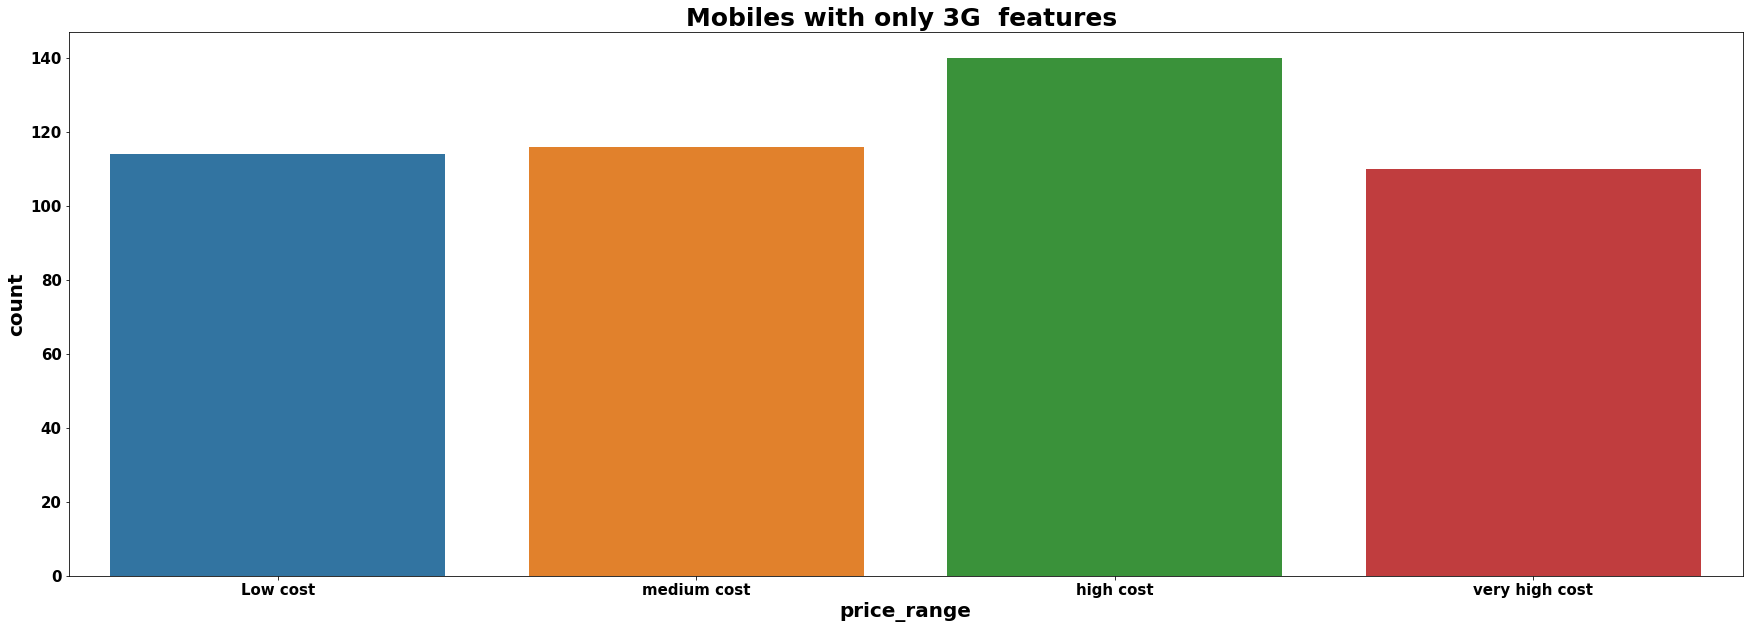

In [35]:
plt.figure(figsize=(30,10))
sns.countplot(three_g_df['price_range'])
plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
plt.title("Mobiles with only 3G  features ")
plt.show()

Observations:

Mobiles which has very high cost are very less likely to have 3G.

There are more chances that high cost mobile will have 3G in it.

## Mobiles not having no 3G and 4G.

In [36]:
No_3g_4G_df=data[(data['three_g']!=1) & (data['four_g']!=1)]

In [37]:
No_3g_4G_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842.0,0.0,2.2,0.0,1.0,0.0,7.0,0.6,188.0,2.0,2.0,20.0,756.0,2549.0,9.0,7.0,19.0,0.0,0.0,1.0,1.0
10,769.0,1.0,2.9,1.0,0.0,0.0,9.0,0.1,182.0,5.0,1.0,248.0,874.0,3946.0,5.0,2.0,7.0,0.0,0.0,0.0,3.0
19,682.0,1.0,0.5,0.0,4.0,0.0,19.0,1.0,121.0,4.0,11.0,902.0,1064.0,2337.0,11.0,1.0,18.0,0.0,1.0,1.0,1.0
22,1949.0,0.0,2.6,1.0,4.0,0.0,47.0,0.3,199.0,4.0,7.0,407.0,822.0,1433.0,11.0,5.0,20.0,0.0,0.0,1.0,1.0
30,1579.0,1.0,0.5,1.0,0.0,0.0,5.0,0.2,88.0,7.0,9.0,1358.0,1739.0,3532.0,17.0,11.0,12.0,0.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,1454.0,0.0,2.6,0.0,8.0,0.0,6.0,0.4,199.0,3.0,20.0,698.0,1018.0,1300.0,10.0,9.0,2.0,0.0,0.0,1.0,1.0
1982,1784.0,0.0,1.6,0.0,4.0,0.0,41.0,0.4,164.0,6.0,20.0,610.0,1437.0,2313.0,14.0,1.0,11.0,0.0,1.0,0.0,2.0
1983,1262.0,0.0,1.8,1.0,12.0,0.0,34.0,0.1,149.0,5.0,16.0,223.0,737.0,3248.0,13.0,3.0,4.0,0.0,1.0,1.0,2.0
1988,1547.0,1.0,2.9,0.0,2.0,0.0,57.0,0.4,114.0,1.0,3.0,347.0,957.0,1620.0,9.0,2.0,19.0,0.0,1.0,1.0,1.0


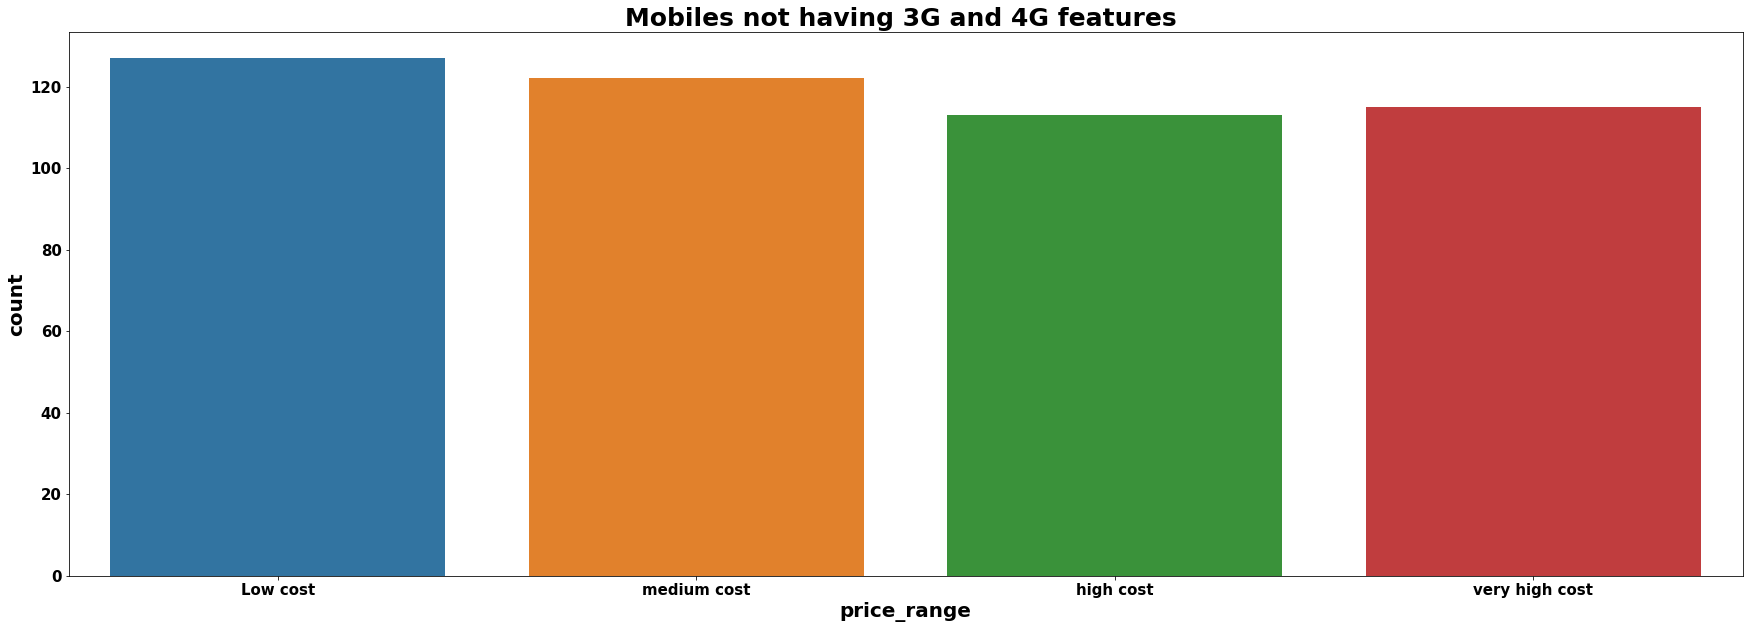

In [38]:
plt.figure(figsize=(30,10))
sns.countplot(No_3g_4G_df['price_range'])
plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
plt.title("Mobiles not having 3G and 4G features ")
plt.show()

Its very obvious that low cost mobiles will not have 3G and 4G.

Mobiles with very high cost may have 5G. As we know technologies are changes everytime.

## Cores vs Price Range

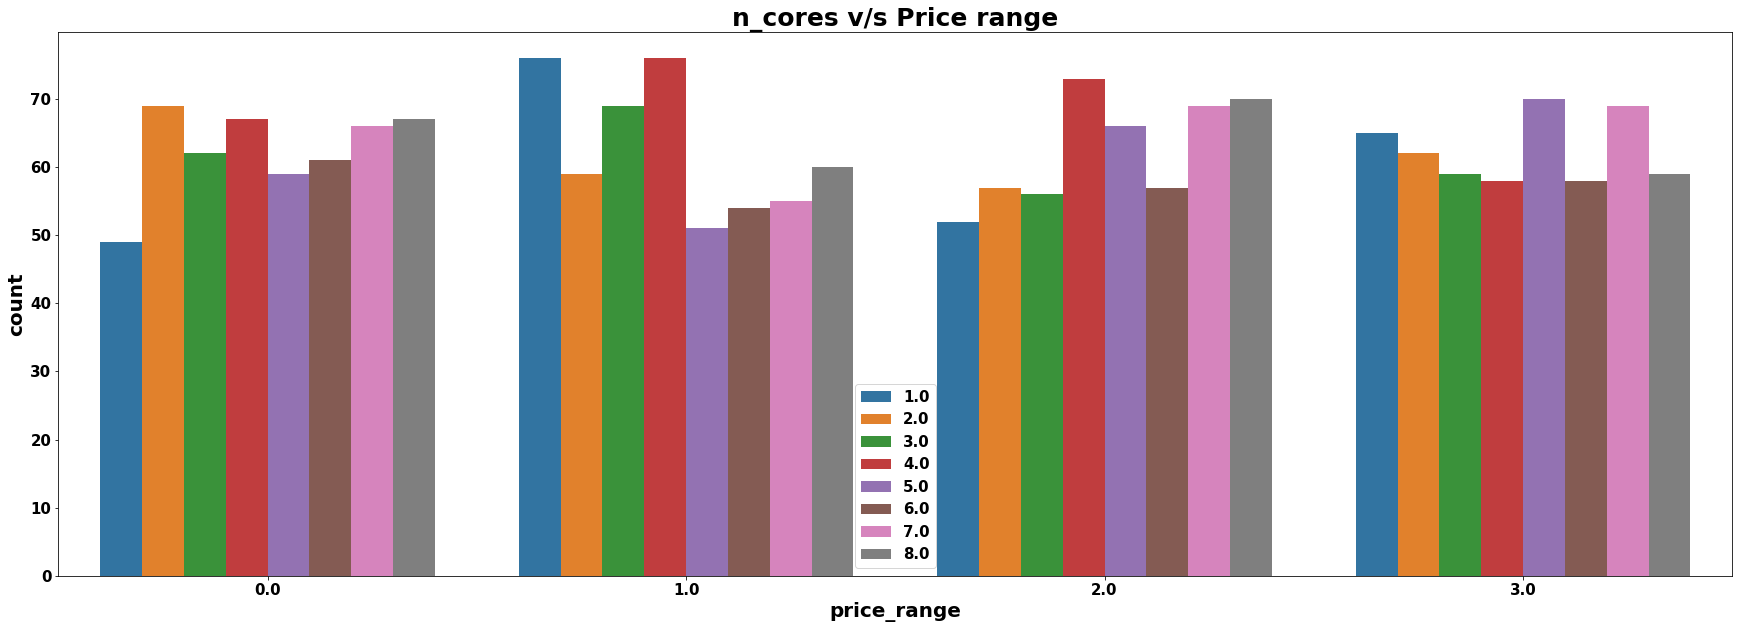

In [39]:
# n_cores v/s price range
plt.figure(figsize=(30,10))
sns.countplot(data['price_range'],hue=data['n_cores'])
plt.title("n_cores v/s Price range")
plt.legend(loc='best')
plt.show()

Observations:

Price range 0 has majority of phones with 2 core processors

Price range 1 has majority of phones with 1 and 4 core processors

Price range 2 has majority of phones with 4 core processors

Price range 3 has majority of phones with 5 and 7 core processors

## 4g  Feature

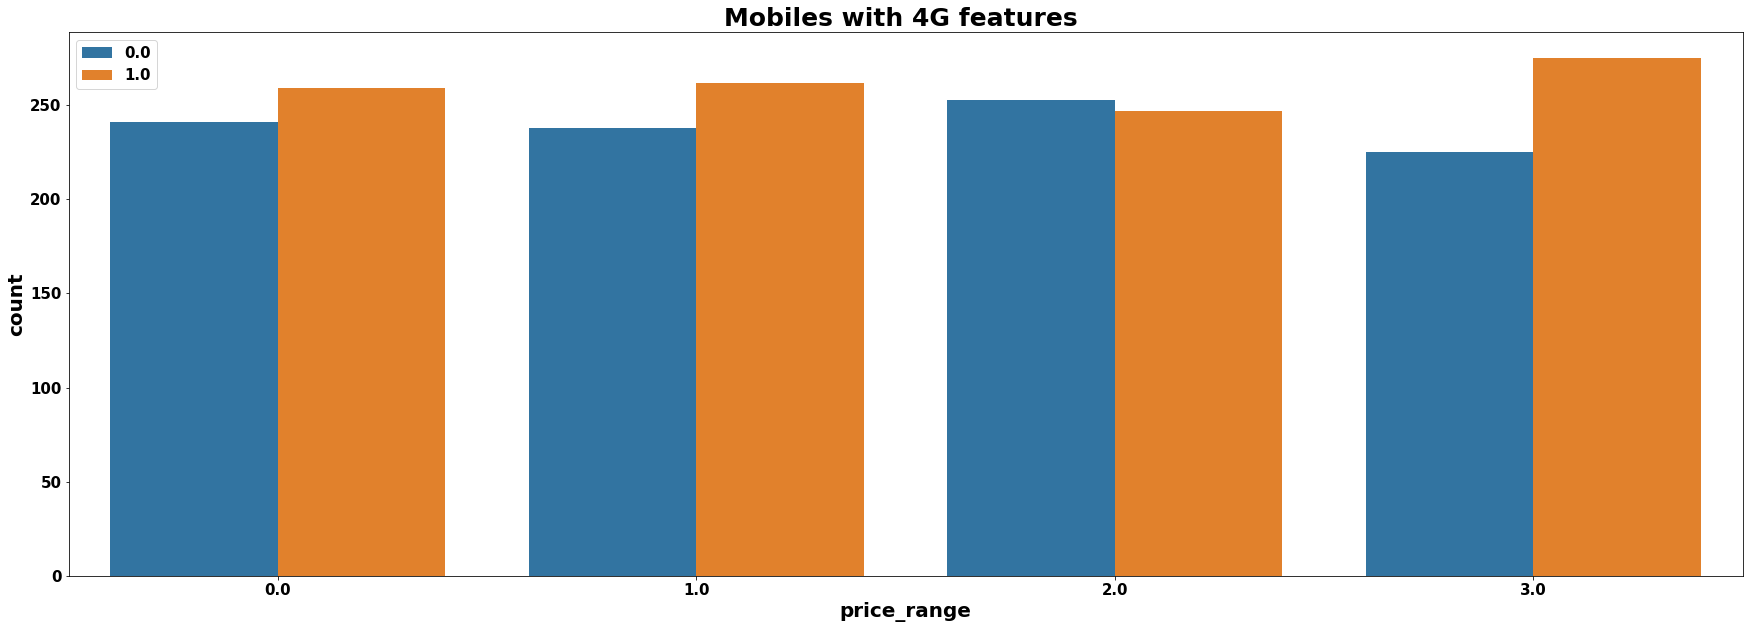

In [40]:
plt.figure(figsize=(30, 10))
sns.countplot(data['price_range'],hue=data['four_g'])
plt.title("Mobiles with 4G features ")
plt.legend(loc='best')
plt.show()

Majority of phones of only price range 2 dont have 4G service.

## Bluetooth Feature

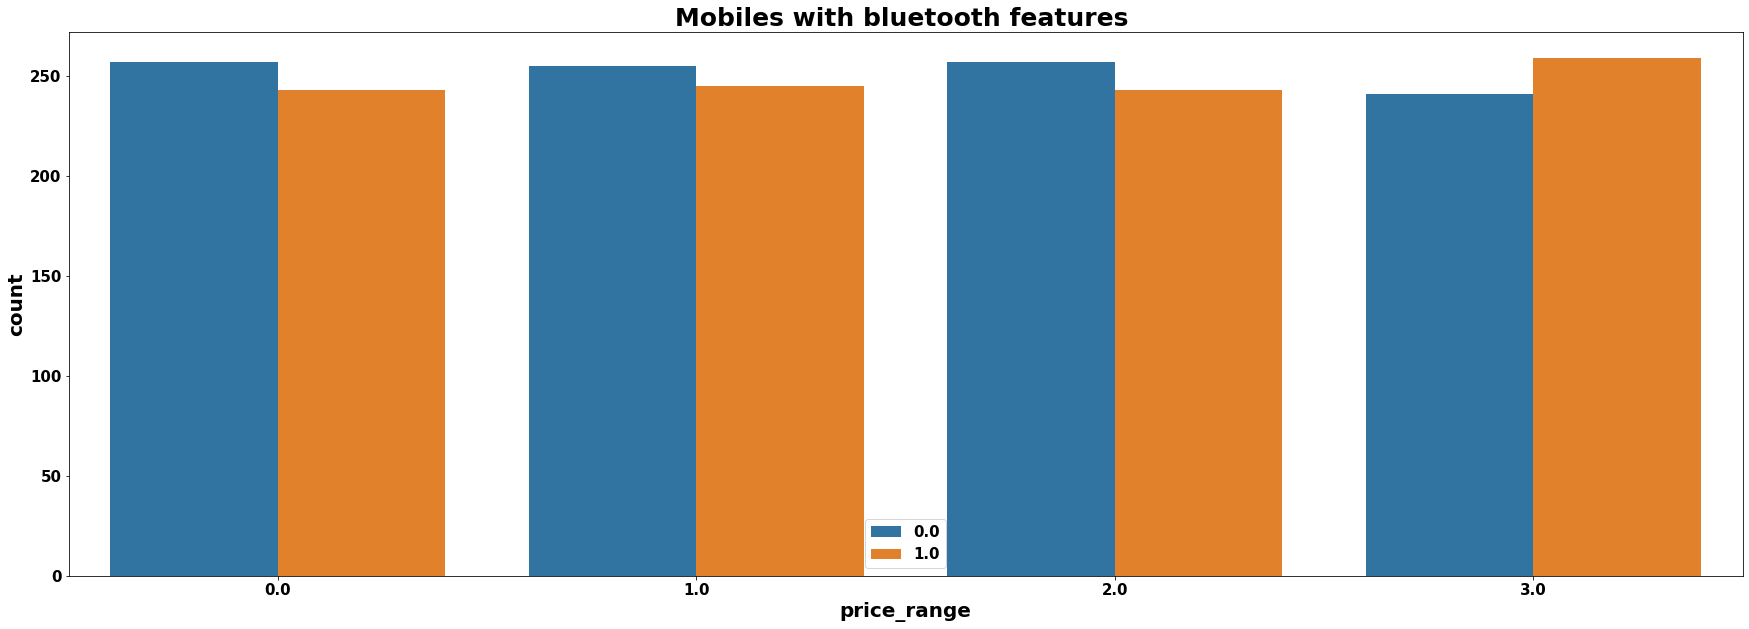

In [41]:
plt.figure(figsize=(30, 10))
sns.countplot(data['price_range'],hue=data['blue'])
plt.title("Mobiles with bluetooth features ")
plt.legend(loc='best')
plt.show()

Majority of phones of price range from 0 to 2 dont have bluetooth on other hand price range of 3 have bluetooth service.

## Let's Check the distribution of numerical columns and Outliers.

In [42]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [43]:
# numeric col list
numeric_col=['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height',
             'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time',]

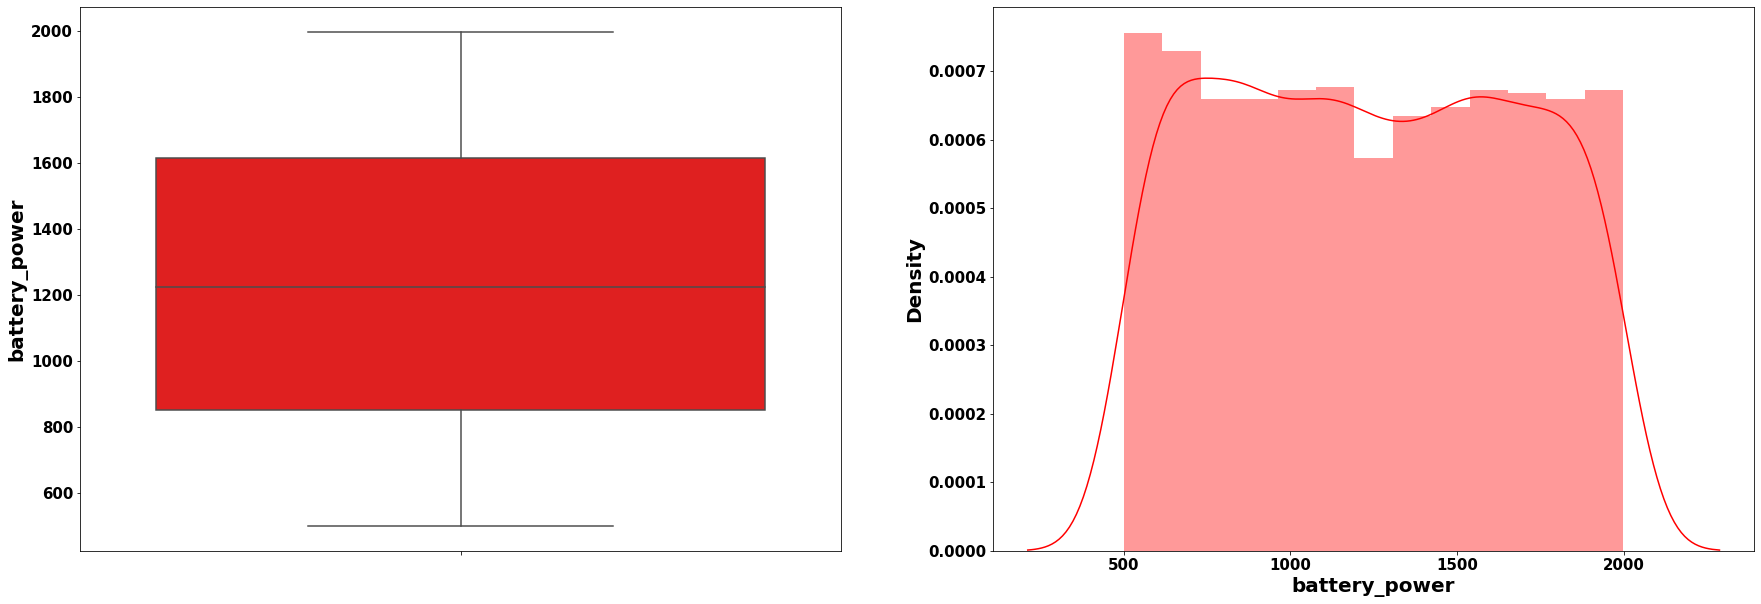

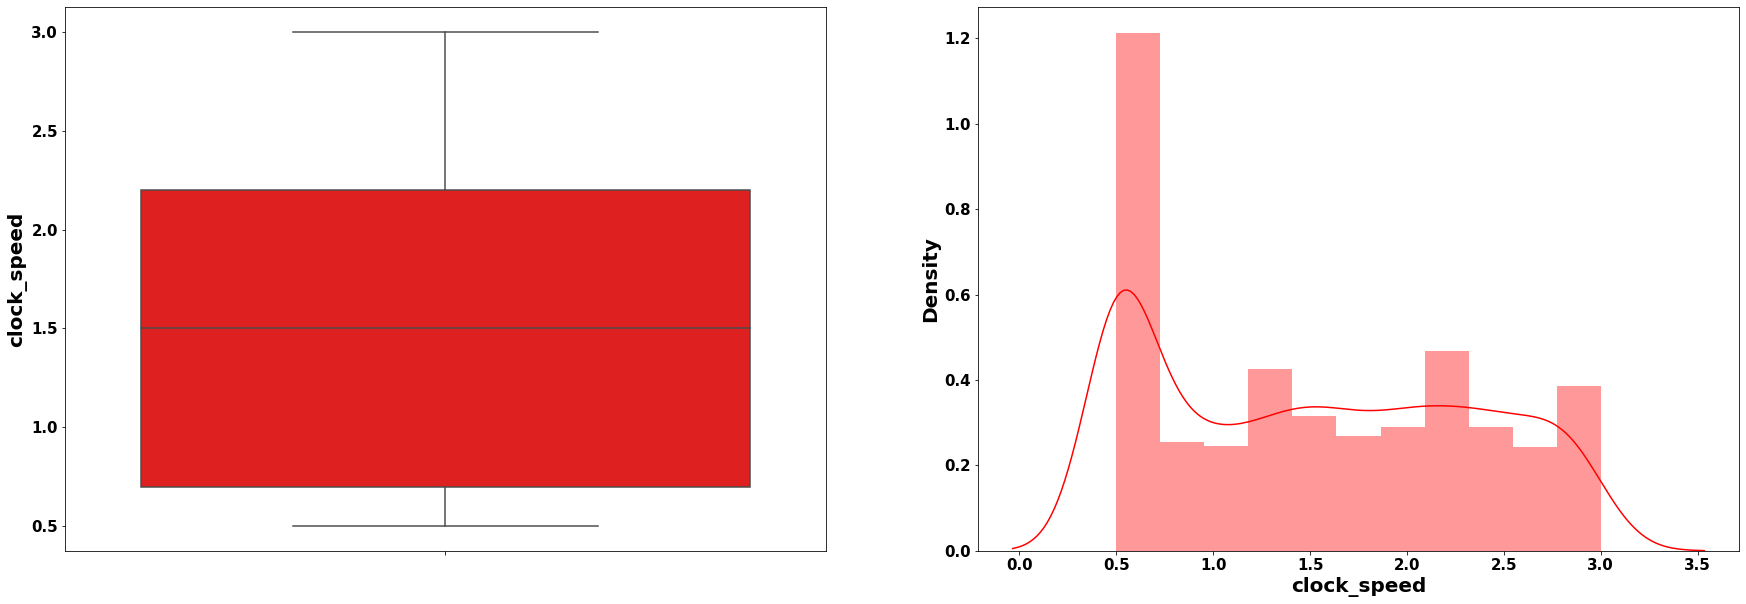

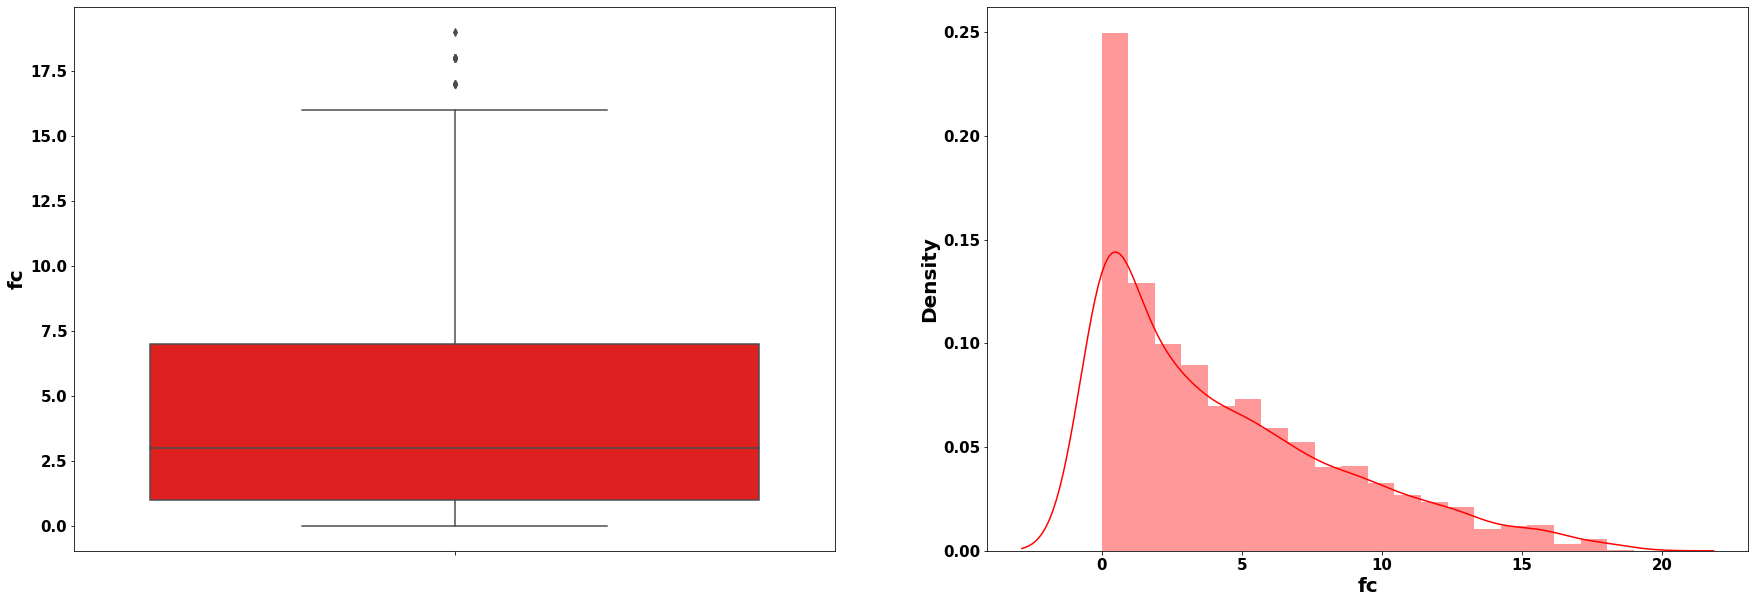

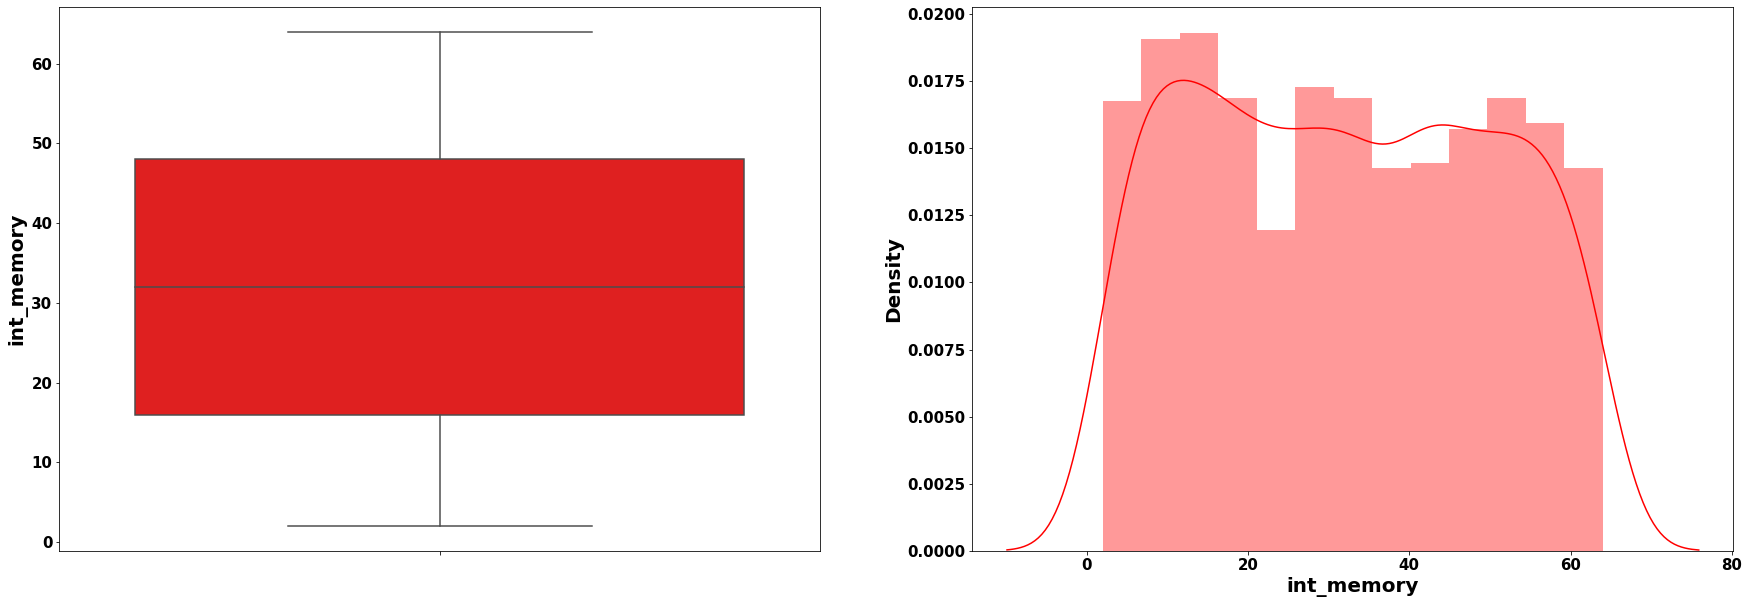

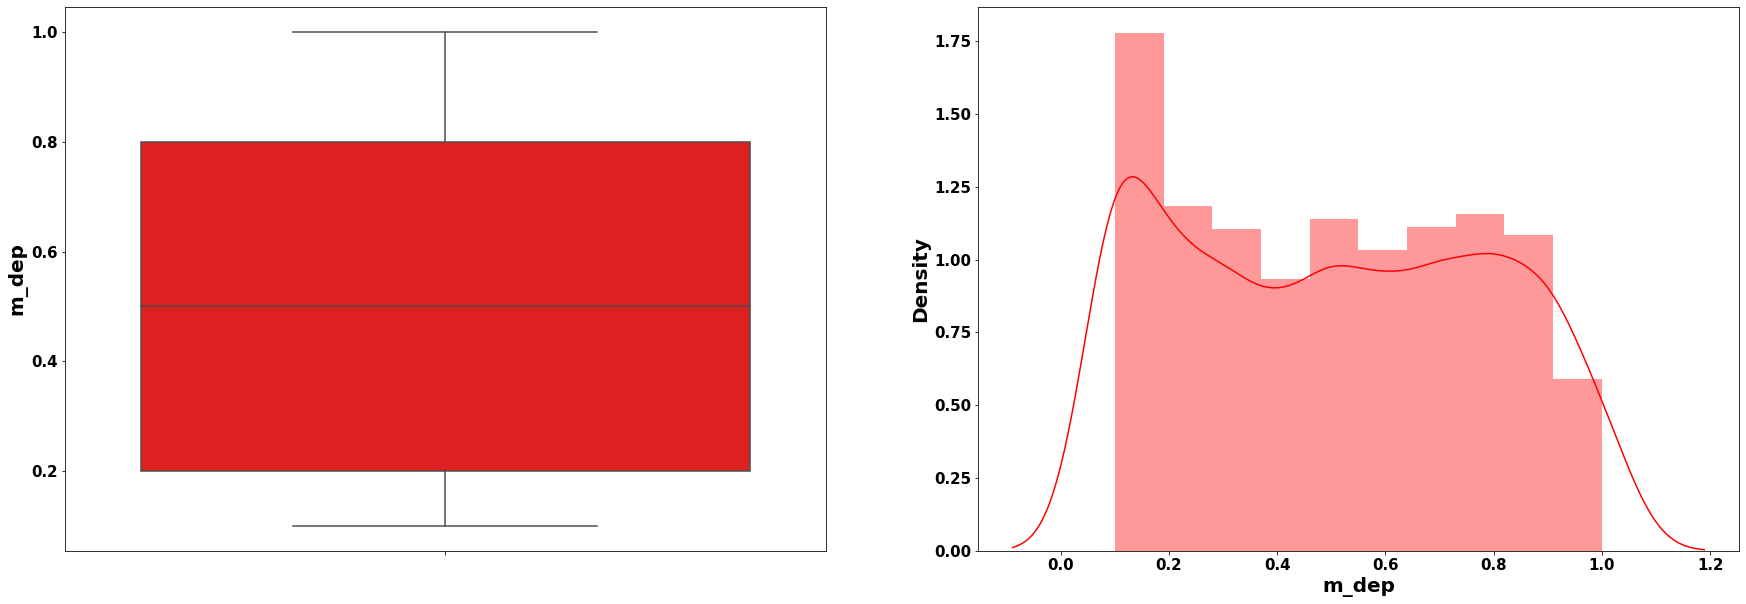

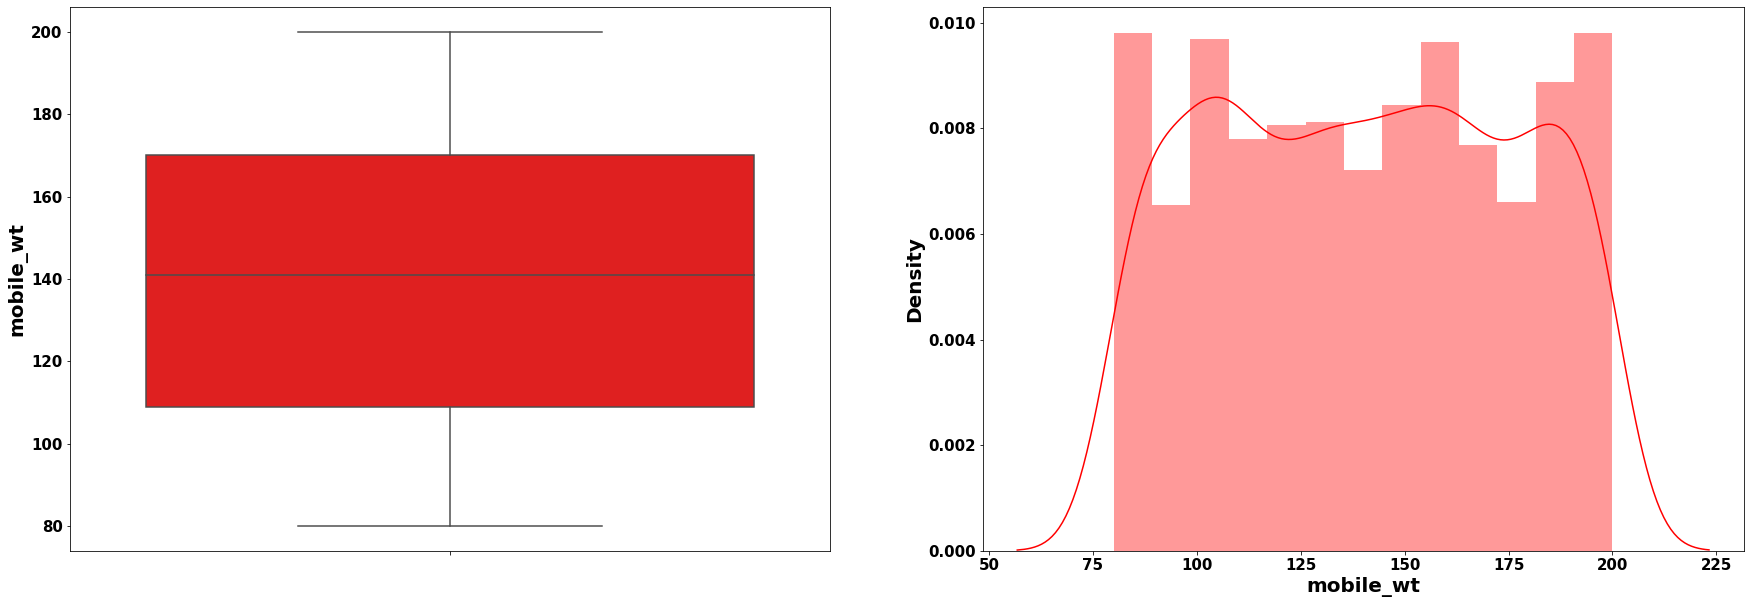

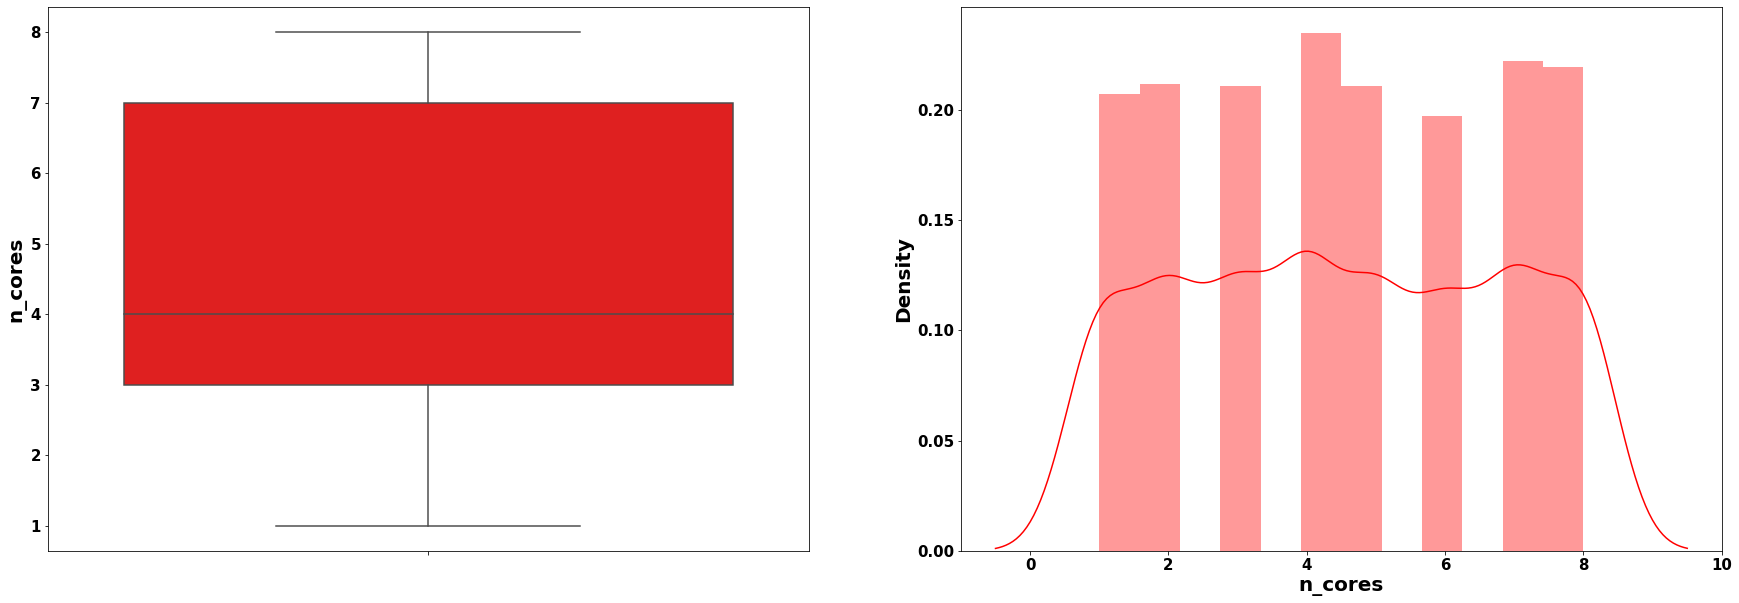

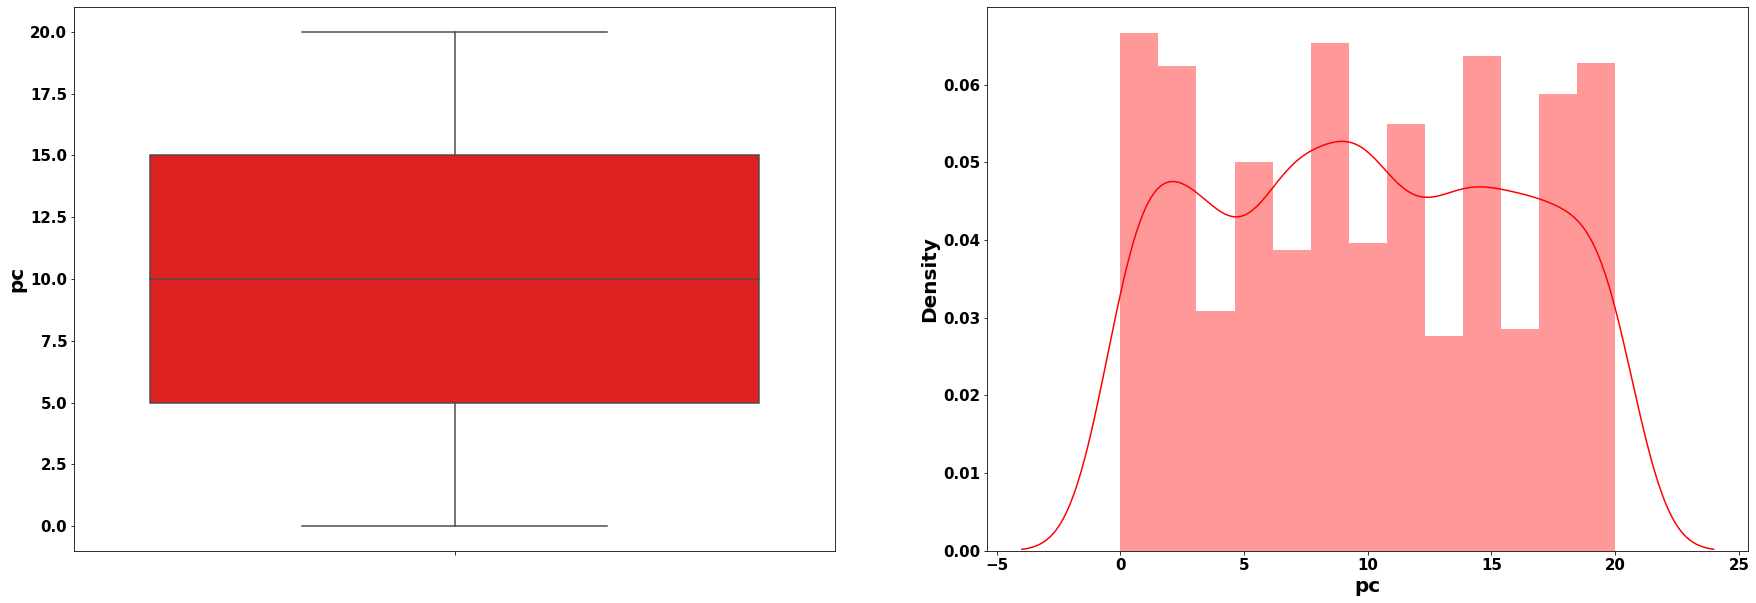

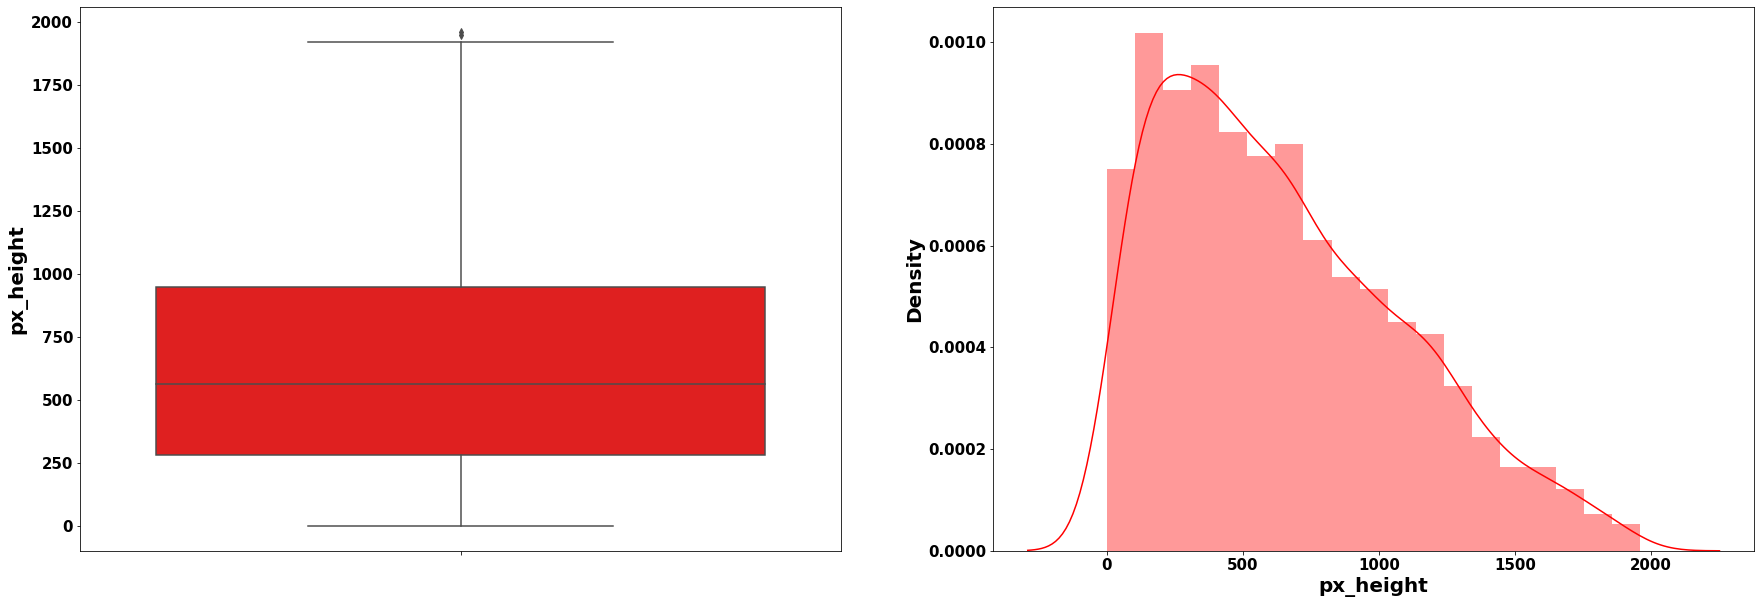

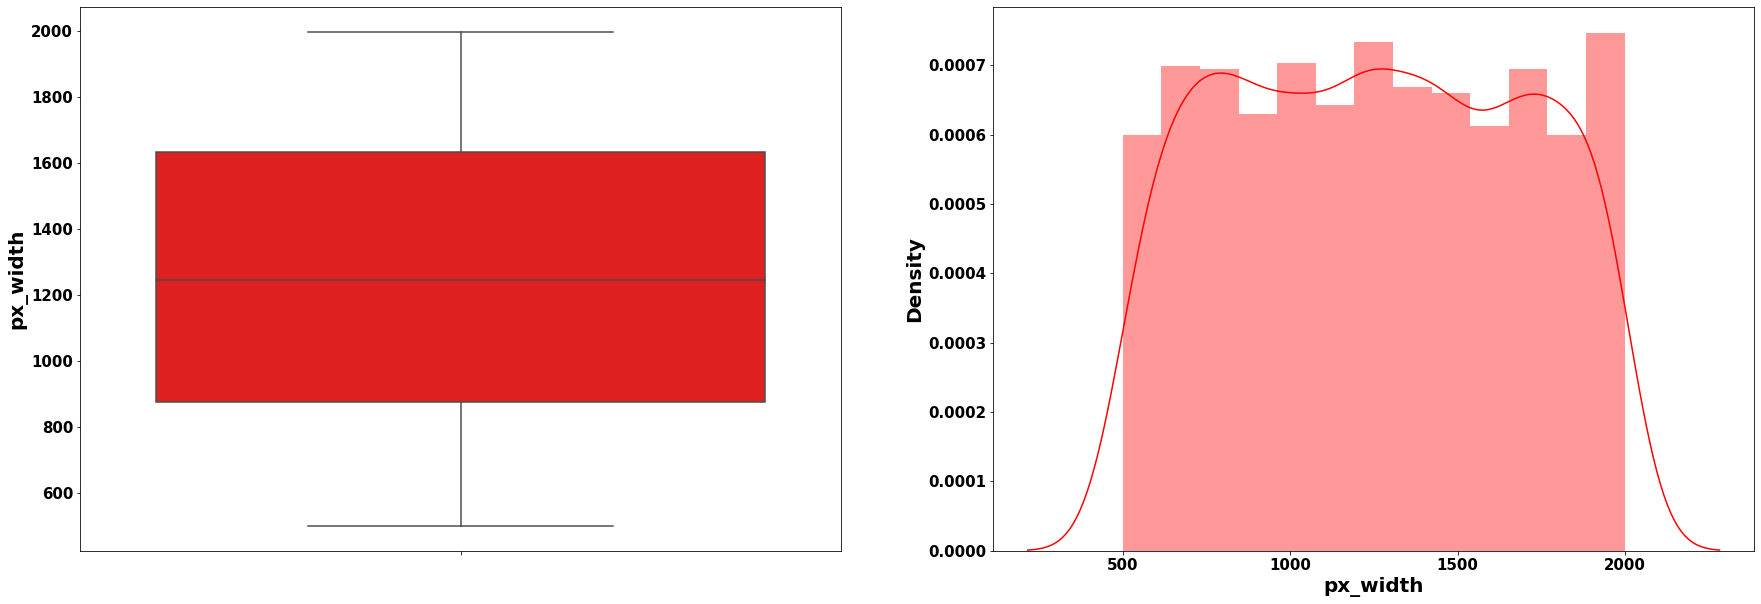

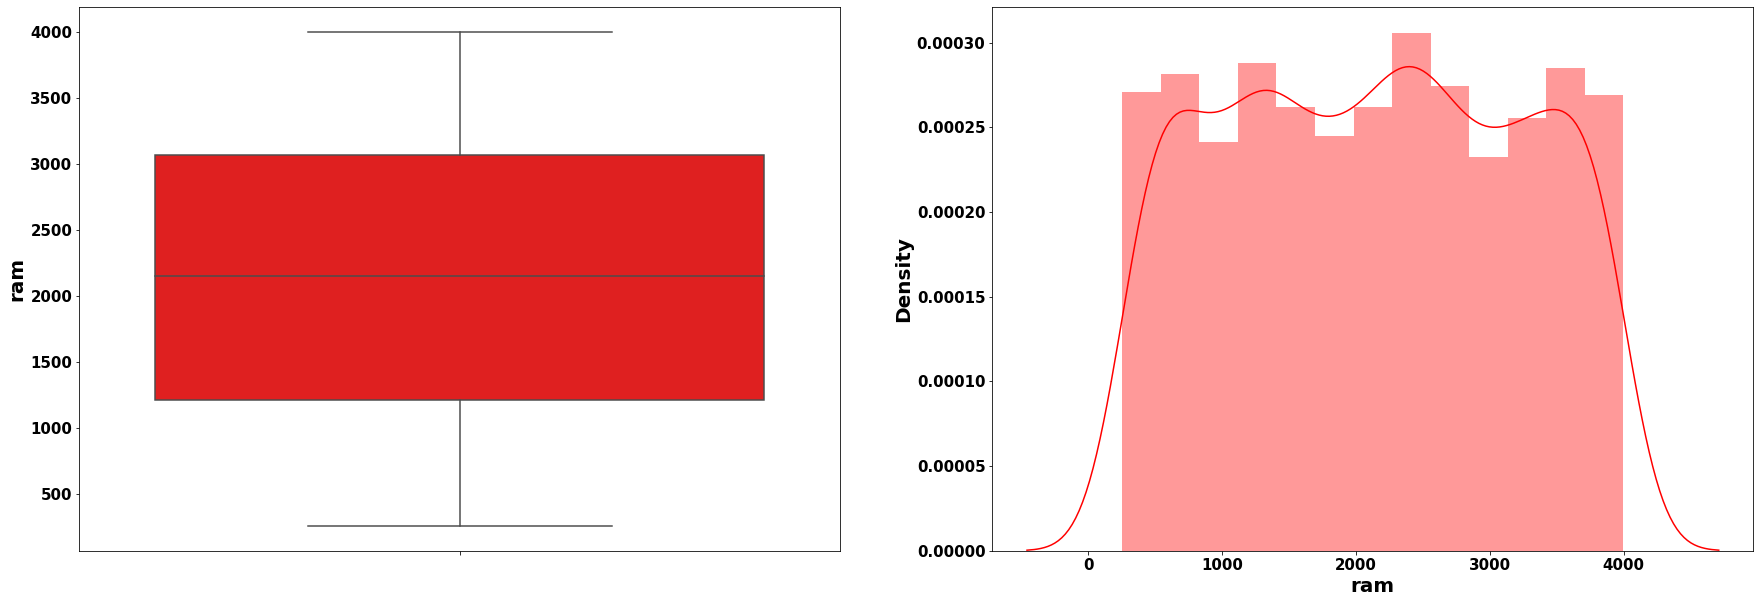

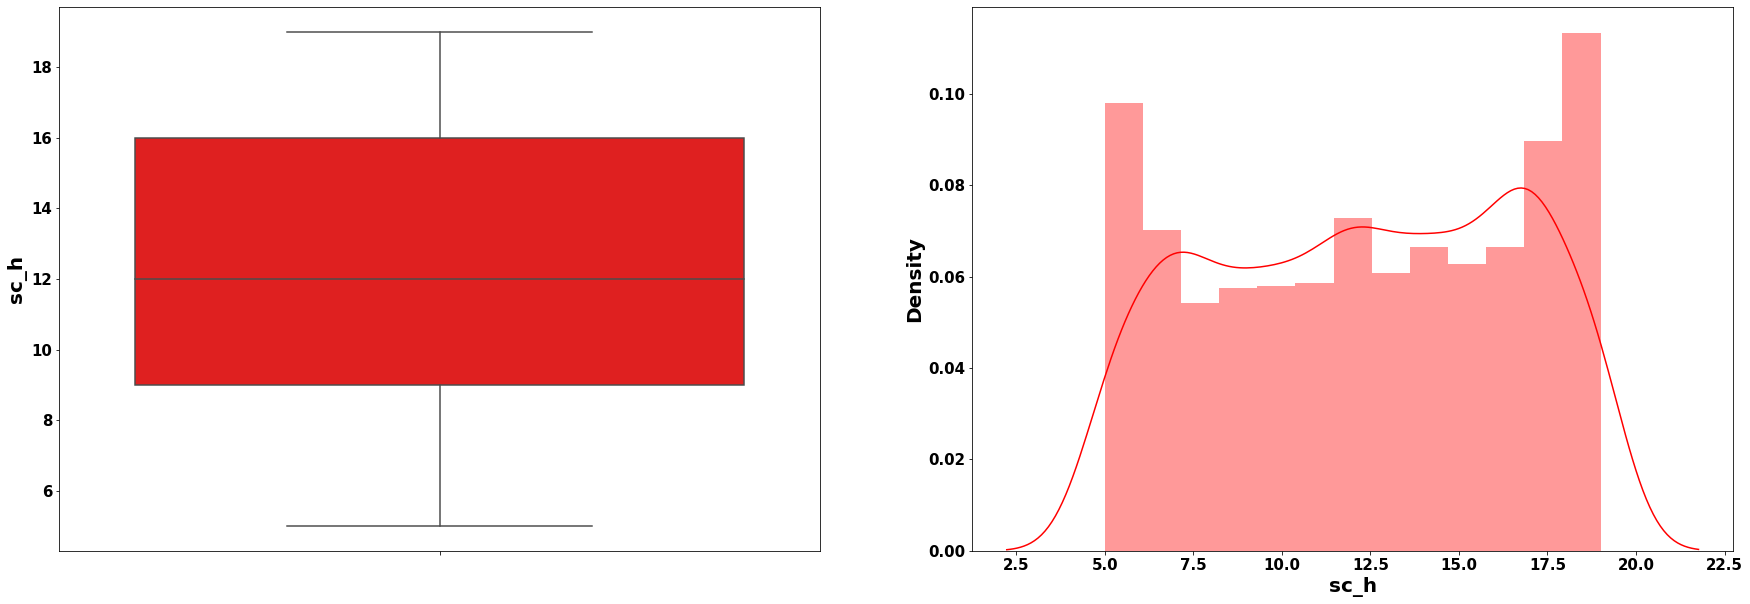

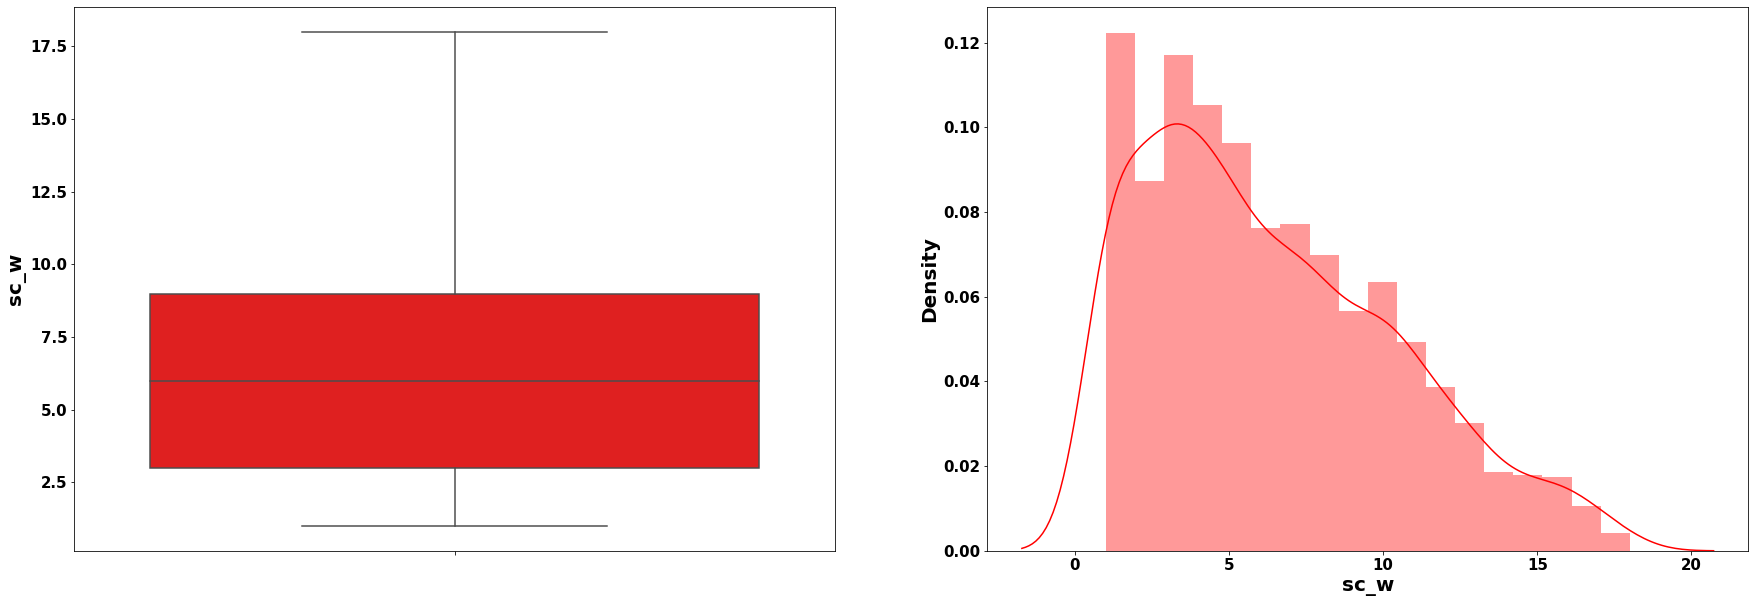

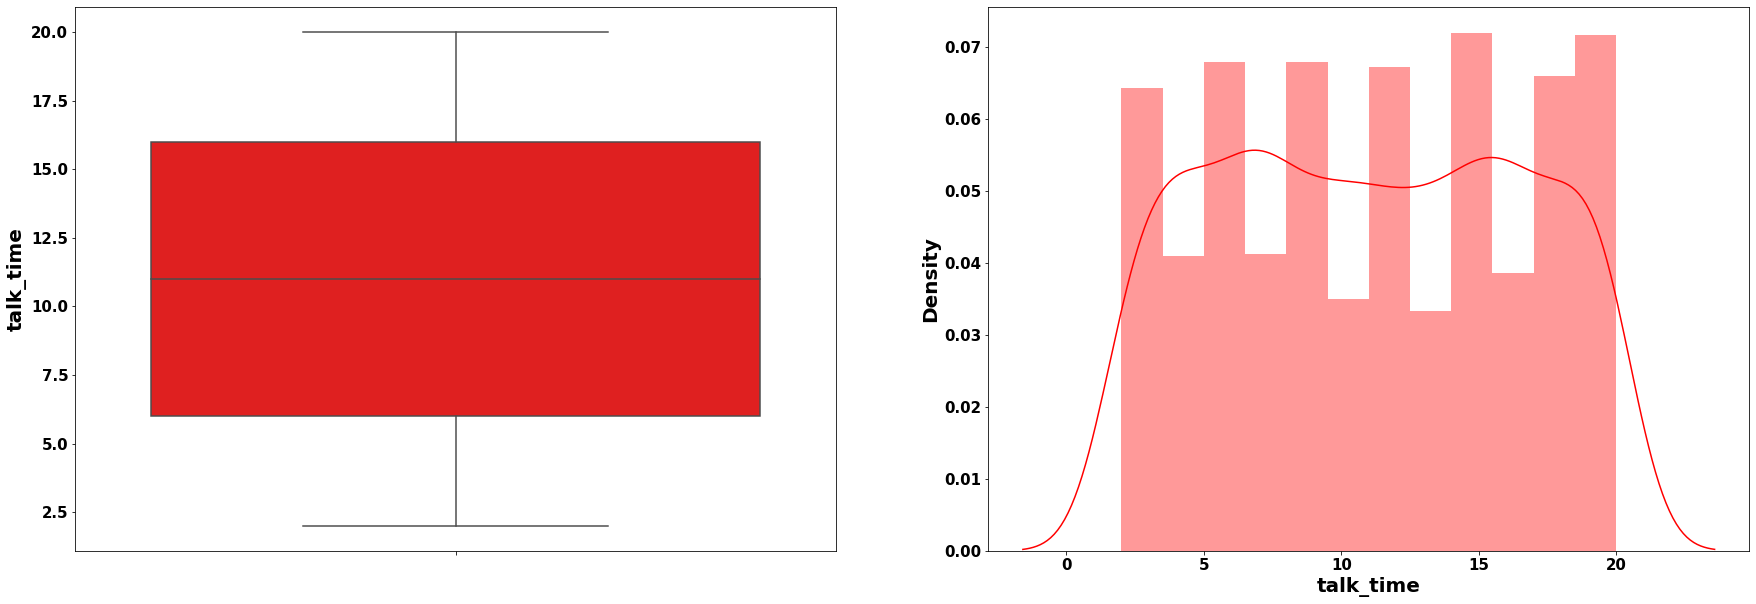

In [44]:
# plotting boXplot and distribution
for var in numeric_col:
    plt.figure(figsize=(30,10))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=data[var],color='red')
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(data[var],color='red')
    
    fig.set_xlabel(var)

    plt.show()

Data is well distrubted.
fc and px_height has some outliers.


## Outlier Treatment

In [45]:
Q1 = data["fc"].quantile(0.25)
Q3 = data['fc'].quantile(0.991)
IQR = Q3-Q1

# Outliers are present after Quartile 3. so we will take datapoints before Q3.
data = data[(data['fc'] <= Q3)]

In [46]:
Q1 = data["px_height"].quantile(0.25)
Q3 = data['px_height'].quantile(0.991)
IQR = Q3-Q1

# Outliers are present after Quartile 3. so we will take datapoints before Q3.
data = data[(data['px_height'] <= Q3)]

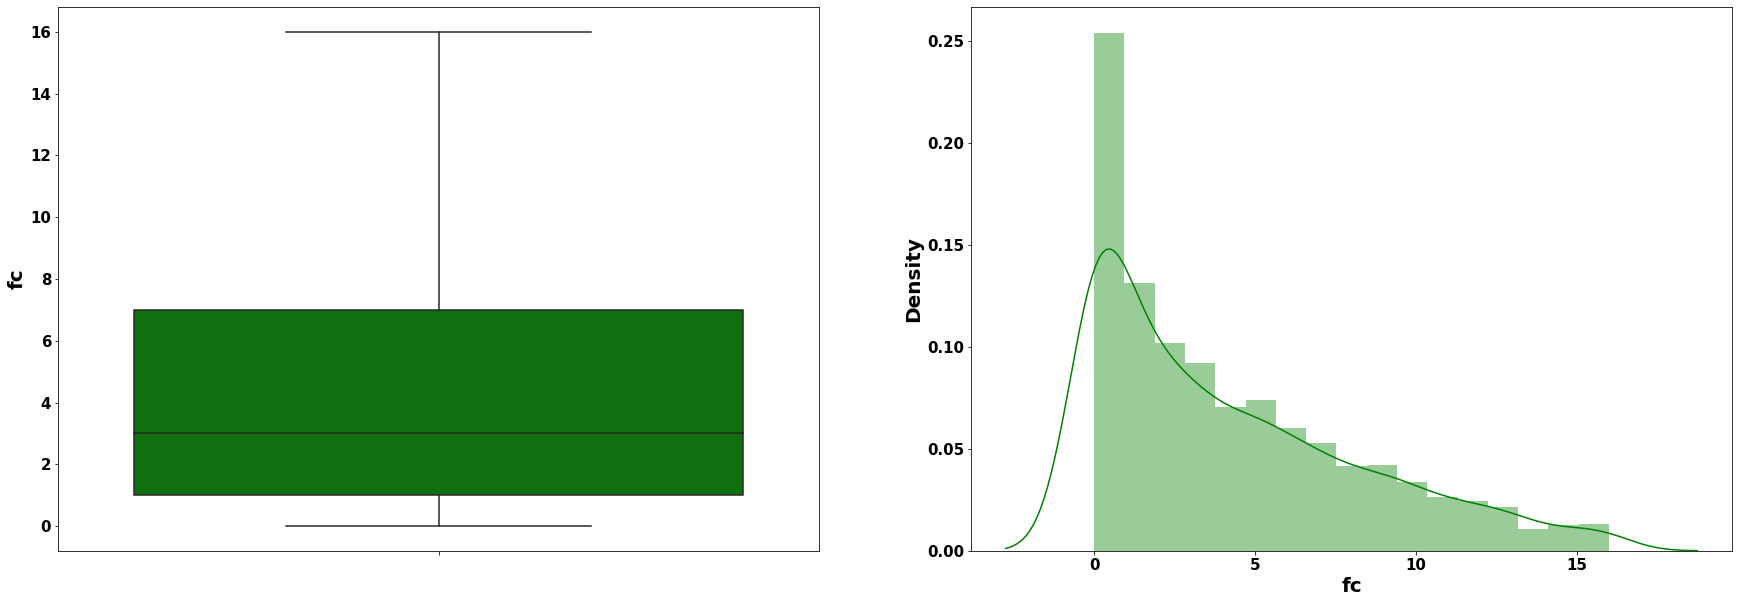

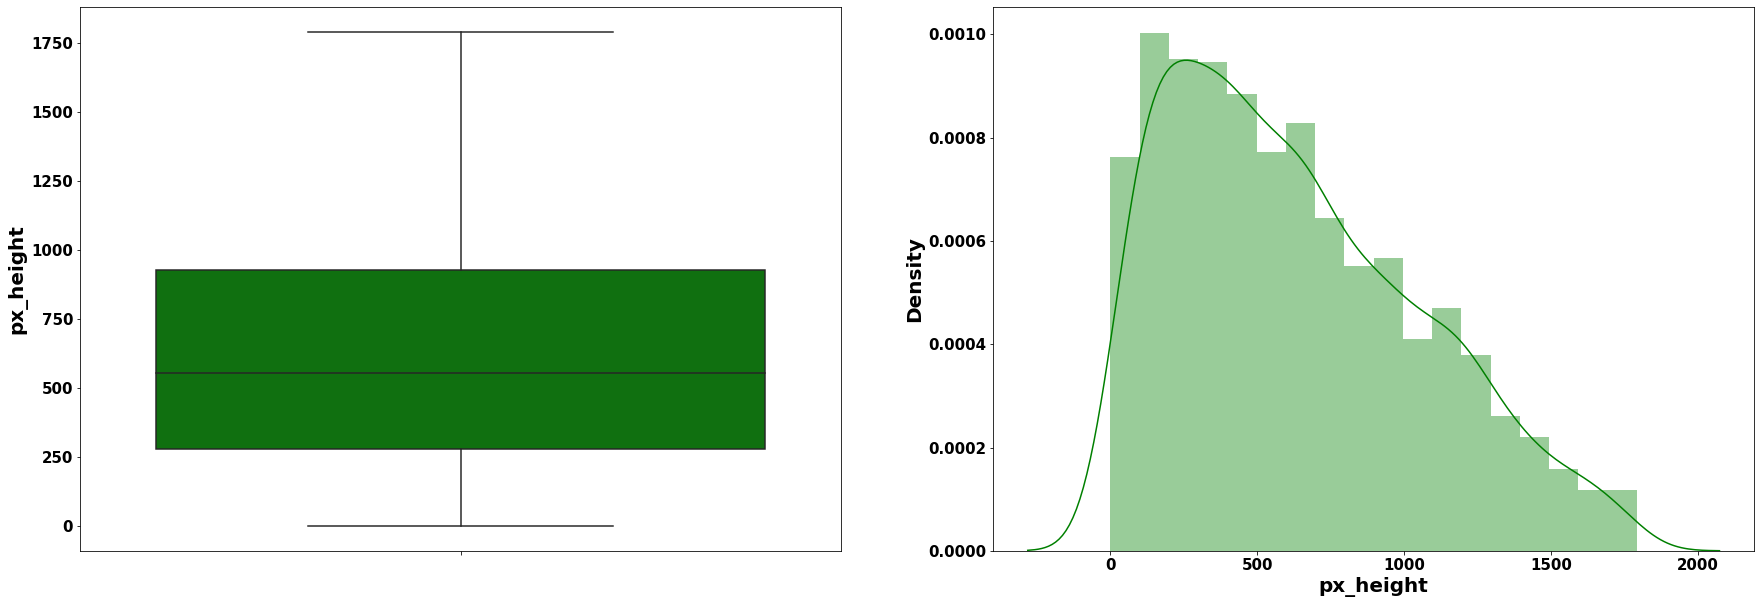

In [47]:
# Visualising whether oultliers are removed or not.

for var in ['fc','px_height']:
    plt.figure(figsize=(30,10))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=data[var],color='green')
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(data[var],color='green')
    
    fig.set_xlabel(var)

    plt.show()

Thus we can see in box plot no oultiers are present.

In [48]:
data.shape

(1964, 21)

In [49]:
data_df=data.copy()

## Feature Selection

In [50]:
# checking newly created column.
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842.0,0.0,2.2,0.0,1.0,0.0,7.0,0.6,188.0,2.0,2.0,20.0,756.0,2549.0,9.0,7.0,19.0,0.0,0.0,1.0,1.0
1,1021.0,1.0,0.5,1.0,0.0,1.0,53.0,0.7,136.0,3.0,6.0,905.0,1988.0,2631.0,17.0,3.0,7.0,1.0,1.0,0.0,2.0
2,563.0,1.0,0.5,1.0,2.0,1.0,41.0,0.9,145.0,5.0,6.0,1263.0,1716.0,2603.0,11.0,2.0,9.0,1.0,1.0,0.0,2.0
3,615.0,1.0,2.5,0.0,0.0,0.0,10.0,0.8,131.0,6.0,9.0,1216.0,1786.0,2769.0,16.0,8.0,11.0,1.0,0.0,0.0,2.0
4,1821.0,1.0,1.2,0.0,13.0,1.0,44.0,0.6,141.0,2.0,14.0,1208.0,1212.0,1411.0,8.0,2.0,15.0,1.0,1.0,0.0,1.0


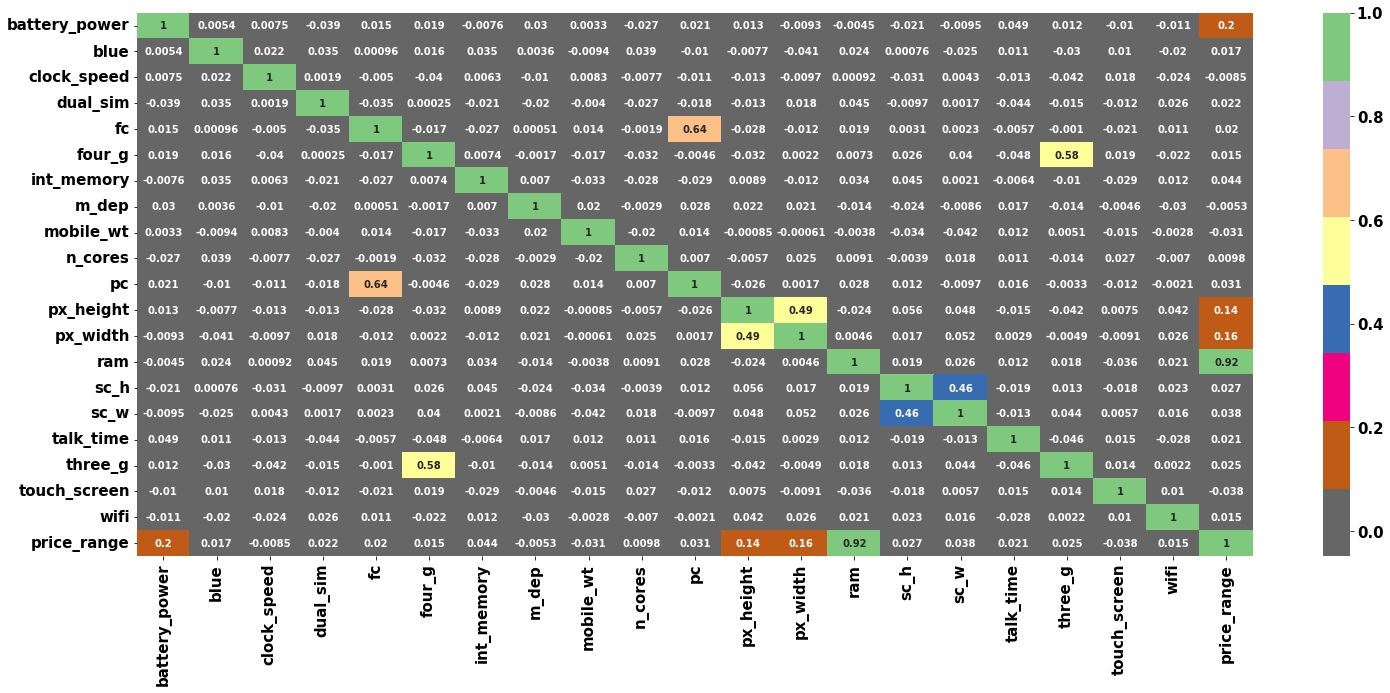

In [51]:
corr= data.corr()
plt.figure(figsize=(25,10))
sns.heatmap(corr,annot=True, cmap=plt.cm.Accent_r)

In [52]:
# Separating X variables(indpendent variables) and Y(dependent variable) variable.
X=data.drop('price_range',axis=1)
y=data["price_range"]

In [53]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [54]:
#Now we Will select the top 12 important features
bestfeatures = SelectKBest(score_func=chi2, k=12)
fit = bestfeatures.fit(X,y)

In [55]:
# creating score's and coolumn's dataframe
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [56]:
# conacatenating above two dataframes
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

In [57]:
# Check dataframe
featureScores

,Specs,Score
0,battery_power,13399.493422
1,blue,0.574942
2,clock_speed,0.801821
3,dual_sim,0.692208
4,fc,10.807547
5,four_g,1.373364
6,int_memory,79.335880
7,m_dep,0.806024
8,mobile_wt,89.225442
9,n_cores,8.051487


In [58]:
# 12 features with highest chi squared statistic 
print(featureScores.nlargest(12,'Score'))

            Specs          Score
13            ram  915771.566479
11      px_height   15390.460943
0   battery_power   13399.493422
12       px_width    9299.682574
8       mobile_wt      89.225442
6      int_memory      79.335880
14           sc_h      11.939828
15           sc_w      11.601751
16      talk_time      11.272551
4              fc      10.807547
9         n_cores       8.051487
10             pc       7.681300


In [59]:
# 12 features with highest chi squared statistic are selected as independent variables.
X=mobile_data[['ram','px_height','battery_power','px_width','mobile_wt','int_memory','sc_h','talk_time','sc_w','fc','n_cores','pc']]

# dependent varaible
y=mobile_data['price_range']

# Predictive Modeling:

## Algorithms used for predictive modeling:

### 1) Decision Tree

### 2) Random Forest classifier

### 3) Gradient Boosting Classifier

### 4) K-nearest Neighbour classifier

### 5) XG Boost Classifier

### 6) Support Vector Machine(SVM)

As Decision tree,random forest and enssembles trees do not require Feature scaling as these are Tree based models. So we will be using X_train and X_test which are not scaled.

For K nearest Neighbors and SVM we will be usingseX_train_scaled and X_test_scaled. That is we we will use Standardised data. i.e. Scaled data. As these are distance based Algorithms.

In [60]:
# importing all essential libraries.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix,confusion_matrix,roc_curve,roc_auc_score,auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [61]:
# splitting the data into Train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1498, 12)
(500, 12)
(1498,)
(500,)


In [62]:
# Scaling the data.
# creating an object of MinMax Scaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)   # fitting the X_train
X_test_scaled=scaler.transform(X_test)         # transforming X_test

In [63]:
X_train_scaled

array([[-0.5569464 ,  2.17433843,  0.48153645, ..., -0.97448889,
         0.22343391, -1.11407372],
       [-0.4280024 , -0.01353806, -0.71269622, ..., -0.74303426,
         1.10889424, -0.78687395],
       [ 0.08128001,  0.0719083 , -0.05176593, ...,  0.18278427,
        -1.54748674,  1.50352445],
       ...,
       [-1.48552872, -0.63639705,  1.1310714 , ...,  1.34005742,
         0.66616408,  1.33992456],
       [-1.00685891, -1.07936896, -0.09051012, ..., -0.51157963,
        -1.54748674, -0.45967418],
       [ 0.28350873, -0.26088279, -1.19585906, ...,  2.03442132,
        -0.66202641,  1.50352445]])

In [64]:
X_test_scaled

array([[ 1.2111634 , -0.91971918,  0.50888529, ..., -0.74303426,
        -0.21929625, -1.11407372],
       [ 1.62489738, -1.42790016, -1.6402777 , ..., -0.74303426,
        -1.10475658,  0.03112548],
       [-1.06159054, -1.07262319, -0.4483241 , ..., -0.51157963,
        -0.66202641, -0.95047383],
       ...,
       [ 0.0979778 ,  1.51999921,  0.16474572, ...,  0.4142389 ,
         1.55162441,  0.84912491],
       [ 0.31597664, -0.86575306,  0.0143271 , ..., -0.51157963,
         1.55162441, -0.78687395],
       [-0.92800827, -0.5284648 , -0.54176597, ..., -0.97448889,
         1.10889424,  0.52192514]])

In [65]:
# Defining a fucnction for plotting roc curve
def plot_Auc_roc(y_test,pred_prob):
  '''It will take y_test and y predicted probabilities
  as input and will plot the roc curve.'''

  fpr = {}
  tpr = {}
  thresh ={}

  n_class = 4

  for i in range(n_class):    
      fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
      
  # plotting    
  plt.figure(figsize=(12,8))
  plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label= ((f'Class 0(Low cost) vs Rest, AUC= {round(auc(fpr[0],tpr[0]),4)}')))
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=((f'Class 1(Medium cost) vs Rest, AUC= {round(auc(fpr[1],tpr[1]),4)}')))
  plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=((f'Class 2(High cost) vs Rest, AUC= {round(auc(fpr[2],tpr[2]),4)}')))
  plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label=((f'Class 3(Very High cost) vs Rest, AUC= {round(auc(fpr[3],tpr[3]),4)}')))
  plt.title('Multiclass ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')
  plt.savefig('Multiclass ROC',dpi=300);  

In [66]:
# creating a class list
Class_cat = ['low cost','medium cost', 'high cost', 'very high cost']

# **Decision Tree Classifier Algorithm :**

Decision trees and ensemble methods do not require feature scaling to be performed as they are not sensitive to the the variance in the data. So here we will use X_train,X_test,y_test and Y_train which are not scaled.




Decision Tree with default hyperparameters:

In [67]:
# Creating object of the decision tree.
dtc=DecisionTreeClassifier(random_state=0)

In [68]:
# fitting/training the train set.
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [69]:
# Predicting y values of train and test data.
y_train_pred=dtc.predict(X_train)
y_pred=dtc.predict(X_test)

In [70]:
# Checking train set accuracy.
accuracy_score(y_train,y_train_pred)

1.0

In [71]:
# Checking test set accuracy
accuracy_score(y_test,y_pred)

0.846

In [72]:
# Confusion matrix for test set.
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[118,   9,   1,   0],
       [ 10,  91,   7,   0],
       [  0,  15, 104,  14],
       [  0,   0,  21, 110]])

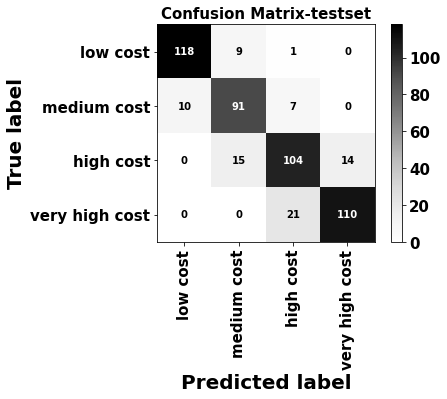

In [73]:
# plotting confusion matrix for test set.
plot_confusion_matrix(dtc,X_test,y_test,cmap='Greys',display_labels=Class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [74]:
# Printing classification of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       372
           1       1.00      1.00      1.00       391
           2       1.00      1.00      1.00       367
           3       1.00      1.00      1.00       368

    accuracy                           1.00      1498
   macro avg       1.00      1.00      1.00      1498
weighted avg       1.00      1.00      1.00      1498



In [75]:
# printing classification of test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       128
           1       0.79      0.84      0.82       108
           2       0.78      0.78      0.78       133
           3       0.89      0.84      0.86       131

    accuracy                           0.85       500
   macro avg       0.85      0.85      0.85       500
weighted avg       0.85      0.85      0.85       500



**Train set accuracy is 100% and test accuracy is 84%.**

**Model is overfitted on train set and did not generalised well.**

**We will tune hyperparamters to reduce overfitting and try to imporve the model performance.**


## Let's tune some Hyper Parameters of Decision Tree Classifier:

In [76]:
# creating an object of classifier.
dtc_= DecisionTreeClassifier(random_state=0)

In [77]:
# paramter grid values for hyperparameter tunning.
grid_values={'criterion':['gini','entropy'],
             'max_depth':[2,3,4,5,6,9,10,11,12,13,14,15],
             'splitter':['best','random'],
             'min_samples_split':[3,5,10],
             'max_features':['auto','sqrt','log2',None]}

In [78]:
# applying GridSearchCv and fitting the model with it.
dtc_tune=GridSearchCV(dtc_,param_grid=grid_values,cv=5,scoring='accuracy',verbose=3)
dtc_tune.fit(X_train,y_train)   # model fitting.

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.273 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.283 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.337 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.264 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.304 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=random;, score=0.303 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=random;, score=0.267 total time=   0.0s
[CV 3/5] END criterion=gini, 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14,
                                       15],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_split': [3, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [79]:
# getting best parameters for model.
dtc_tune.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': None,
 'min_samples_split': 10,
 'splitter': 'best'}

In [80]:
# getting best estimators
dtc_tune.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=10,
                       random_state=0)

In [81]:
# using best parameters and training the the data.
dtc_optimal=DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=10,
                       random_state=0)
dtc_optimal.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=10,
                       random_state=0)

In [82]:
# predicting y values of train and test set.
y_train_pred=dtc_optimal.predict(X_train)
y_pred=dtc_optimal.predict(X_test)

In [83]:
# Checking the accuarcy score of train set.
accuracy_score(y_train,y_train_pred)

0.9579439252336449

In [84]:
# Checking the accuarcy score of test set.
accuracy_score(y_test,y_pred)

0.854

In [85]:
# getting confusion matrix for test set.
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[113,  15,   0,   0],
       [  7,  98,   3,   0],
       [  0,  12, 109,  12],
       [  0,   0,  24, 107]])

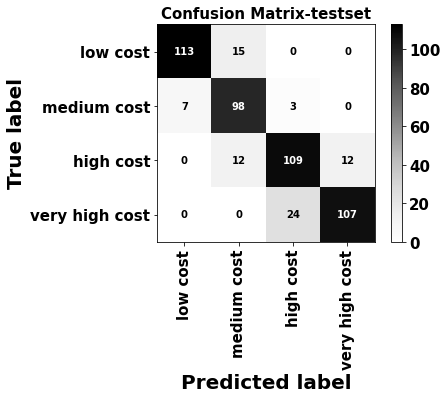

In [86]:
# plotting confusion matrix for test set.
plot_confusion_matrix(dtc_optimal,X_test,y_test,cmap='Greys',display_labels=Class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [87]:
# printing classification report for train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       372
           1       0.93      0.97      0.95       391
           2       0.95      0.92      0.93       367
           3       0.98      0.97      0.97       368

    accuracy                           0.96      1498
   macro avg       0.96      0.96      0.96      1498
weighted avg       0.96      0.96      0.96      1498



In [88]:
# printing classification report for test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       128
           1       0.78      0.91      0.84       108
           2       0.80      0.82      0.81       133
           3       0.90      0.82      0.86       131

    accuracy                           0.85       500
   macro avg       0.86      0.86      0.85       500
weighted avg       0.86      0.85      0.85       500



In [89]:
# creating a function for plotting the feature importances.
def plot_feature_importance(algo):
  ''' Takes the alogorithm as input and 
  plots the feature importance graph'''
  
  # get importance
  importance = algo.feature_importances_
  feat_importance=pd.DataFrame({'Features':X.columns,'score':importance}).sort_values(by='score',ascending=False)
  plt.figure(figsize=(10,8))
  sns.barplot(x=feat_importance['score'],y=feat_importance['Features'])
  plt.title('Feature Importance')

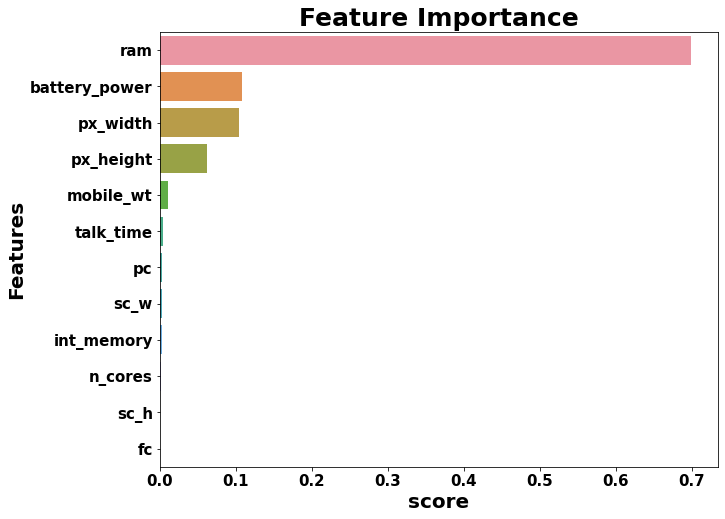

In [90]:
#plotting feature importances
plot_feature_importance(dtc_optimal)

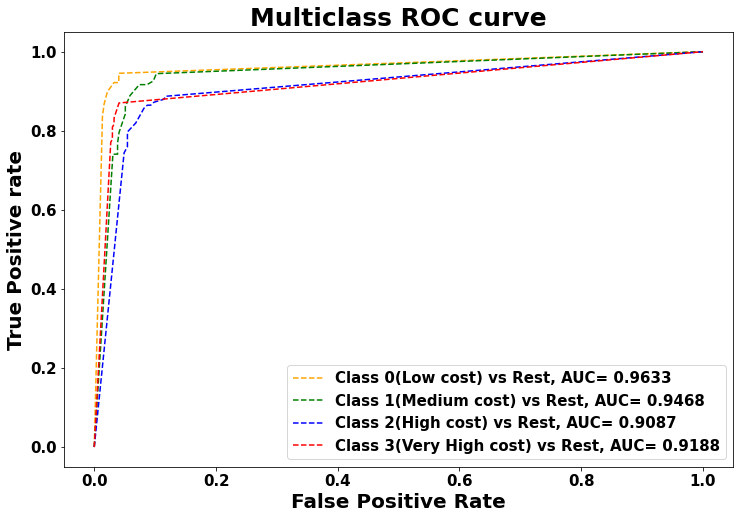

In [91]:
# Plot AUC ROC curve.
pred_prob = dtc_optimal.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)

**Decision Tree Classifier-Observations:**

**Train accuarcy has been reduced to 98% from 100% and test accuarcy is increased by 1% . Thus we somewhat reduced the overfiiting by reducing the training accuarcy. However this will not be good model for us.**

**RAM,battery power,px_height and width came out to be the most important featrures**

**This model classified the class 0 and class 3 very nicely as we can see the AUC is almost 0.96 for both classes,whereas for class 1 and class 2 it is 0.88.**

# **Random Forest Classifier Algorithm :**

In [92]:
# splitting the data into trainset and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [93]:
# creating an object of the classifier.
rfc=RandomForestClassifier(random_state=0)

In [94]:
# fitting/training the model.
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [95]:
# predicting the y values of train set and test set.
y_train_pred=rfc.predict(X_train)
y_pred=rfc.predict(X_test)

In [96]:
# Checking the accuarcy score of train set.
accuracy_score(y_train,y_train_pred)

1.0

In [97]:
# Checking the accuracy score of test set.
accuracy_score(y_test,y_pred)

0.882

In [98]:
# Confusion matrix for test set.
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[123,   5,   0,   0],
       [  6,  93,   9,   0],
       [  0,  16, 107,  10],
       [  0,   0,  13, 118]])

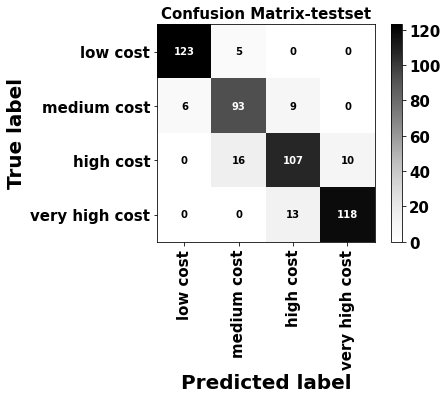

In [99]:
# plotting confusion matrix for test set.
plot_confusion_matrix(rfc,X_test,y_test,cmap='Greys',display_labels=Class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [100]:
# printing the classification report for train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       372
           1       1.00      1.00      1.00       391
           2       1.00      1.00      1.00       367
           3       1.00      1.00      1.00       368

    accuracy                           1.00      1498
   macro avg       1.00      1.00      1.00      1498
weighted avg       1.00      1.00      1.00      1498



In [101]:
# printing the classification report for train set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       128
           1       0.82      0.86      0.84       108
           2       0.83      0.80      0.82       133
           3       0.92      0.90      0.91       131

    accuracy                           0.88       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.88      0.88      0.88       500



**Train accuarcy is 100% and test accuracy is 88% which is quite good.**

**But model seems to be overfitted and has not generalised the data well. We need to reduce overfitting and improve the model performance.**

**We can do some hyperparameter tunning to reduce overfitting**

###Let's tune Hyper Parameters of Decision Tree Classifier:

In [102]:
# creating an object of classifier.
dtc_= DecisionTreeClassifier(random_state=0)

In [103]:
# paramter grid values for hyperparameter tunning.
grid_values={'criterion':['gini','entropy'],
             'max_depth':[2,3,4,5,6,9,10,11,12,13,14,15],
             'splitter':['best','random'],
             'min_samples_split':[3,5,10],
             'max_features':['auto','sqrt','log2',None]}

In [104]:
# applying GridSearchCv and fitting the model with it.
dtc_tune=GridSearchCV(dtc_,param_grid=grid_values,cv=5,scoring='accuracy',verbose=3)
dtc_tune.fit(X_train,y_train)   # model fitting.

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.273 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.283 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.337 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.264 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.304 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=random;, score=0.303 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=random;, score=0.267 total time=   0.0s
[CV 3/5] END criterion=gini, 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14,
                                       15],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_split': [3, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [105]:
# getting best parameters for model.
dtc_tune.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': None,
 'min_samples_split': 10,
 'splitter': 'best'}

In [106]:
# getting best estimators
dtc_tune.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=10,
                       random_state=0)

In [107]:
# using best parameters and training the the data.
dtc_optimal=DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=10,
                       random_state=0)
dtc_optimal.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=10,
                       random_state=0)

In [108]:
# predicting y values of train and test set.
y_train_pred=dtc_optimal.predict(X_train)
y_pred=dtc_optimal.predict(X_test)

In [109]:
# Checking the accuarcy score of train set.
accuracy_score(y_train,y_train_pred)

0.9579439252336449

In [110]:
# Checking the accuarcy score of test set.
accuracy_score(y_test,y_pred)

0.854

In [111]:
# getting confusion matrix for test set.
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[113,  15,   0,   0],
       [  7,  98,   3,   0],
       [  0,  12, 109,  12],
       [  0,   0,  24, 107]])

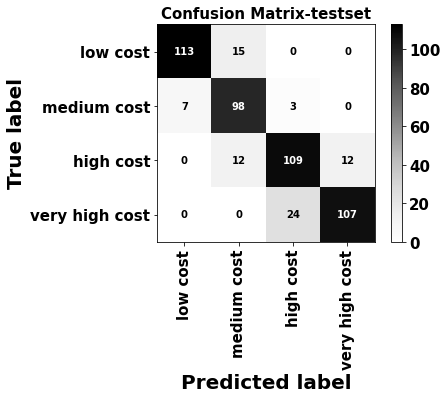

In [112]:
# plotting confusion matrix for test set.
plot_confusion_matrix(dtc_optimal,X_test,y_test,cmap='Greys',display_labels=Class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [113]:
# printing classification report for train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       372
           1       0.93      0.97      0.95       391
           2       0.95      0.92      0.93       367
           3       0.98      0.97      0.97       368

    accuracy                           0.96      1498
   macro avg       0.96      0.96      0.96      1498
weighted avg       0.96      0.96      0.96      1498



In [114]:
# printing classification report for test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       128
           1       0.78      0.91      0.84       108
           2       0.80      0.82      0.81       133
           3       0.90      0.82      0.86       131

    accuracy                           0.85       500
   macro avg       0.86      0.86      0.85       500
weighted avg       0.86      0.85      0.85       500



In [115]:
# creating a function for plotting the feature importances.
def plot_feature_importance(algo):
  ''' Takes the alogorithm as input and 
  plots the feature importance graph'''
  
  # get importance
  importance = algo.feature_importances_
  feat_importance=pd.DataFrame({'Features':X.columns,'score':importance}).sort_values(by='score',ascending=False)
  plt.figure(figsize=(10,8))
  sns.barplot(x=feat_importance['score'],y=feat_importance['Features'])
  plt.title('Feature Importance')

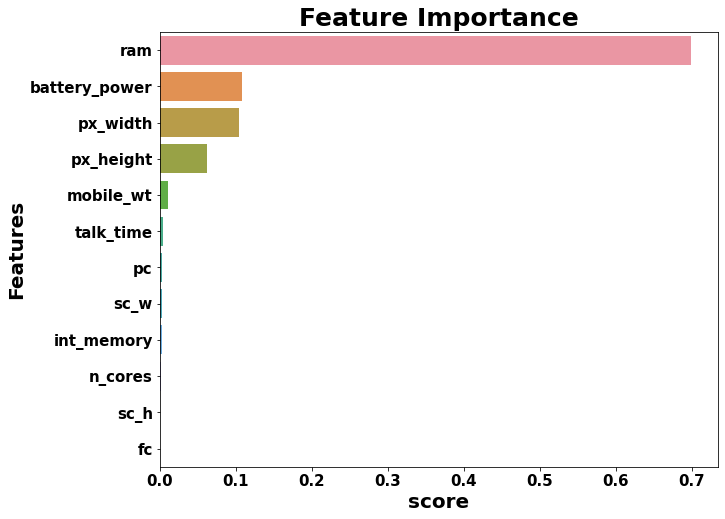

In [116]:
#plotting feature importances
plot_feature_importance(dtc_optimal)

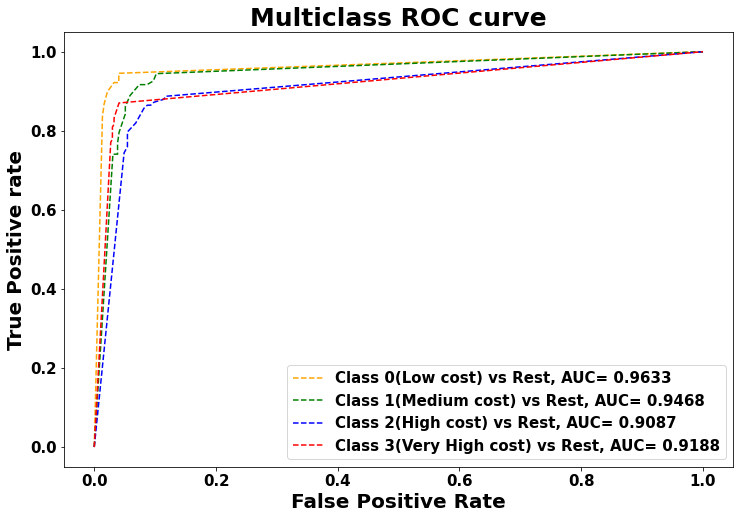

In [117]:
# Plot AUC ROC curve.
pred_prob = dtc_optimal.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)

**Decision Tree Classifier Observations :**

Train accuarcy has been reduced to 98% from 100% and test accuarcy is increased by 1% . Thus we somewhat reduced the overfiiting by reducing the training accuarcy. However this will not be good model for us.

RAM, battery power, px_height and width came out to be the most important featrures.

This model classified the class 0 and class 3 very nicely as we can see the AUC is almost 0.96 for both classes,whereas for class 1 and class 2 it is 0.88.

# **Gradient Boosting Classifier :**

In [118]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [119]:
# creating an object of the classifier
gbc=GradientBoostingClassifier(random_state=0)

In [120]:
# fittng/training the data.
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=0)

In [121]:
# predicting y values of train and test set.
y_train_pred=gbc.predict(X_train)
y_pred=gbc.predict(X_test)

In [122]:
# checking the accuracy score of test data.
accuracy_score(y_test,y_pred)

0.912

In [123]:
# confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[123,   5,   0,   0],
       [  6,  96,   6,   0],
       [  0,  11, 118,   4],
       [  0,   0,  12, 119]])

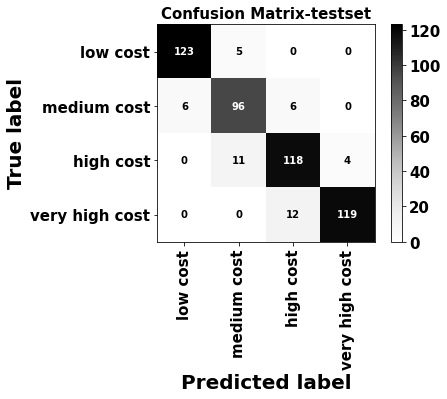

In [124]:
# plotting confusion matrix for test set.
plot_confusion_matrix(gbc,X_test,y_test,cmap='Greys',display_labels=Class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [125]:
# printing the classification report for train set
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       372
           1       1.00      1.00      1.00       391
           2       1.00      1.00      1.00       367
           3       1.00      1.00      1.00       368

    accuracy                           1.00      1498
   macro avg       1.00      1.00      1.00      1498
weighted avg       1.00      1.00      1.00      1498



In [126]:
# printing the classification report for train set
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       128
           1       0.86      0.89      0.87       108
           2       0.87      0.89      0.88       133
           3       0.97      0.91      0.94       131

    accuracy                           0.91       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500



### **Hyper Paramter Tuning of the Random Forest Model :**

In [127]:
# para_grid values to pass in gridsearchcv.
grid_values={'n_estimators':[300, 400, 500, 700],
          'max_depth':[None, 10, 20, 40],
          'min_samples_split':[2,6,10],
          'max_leaf_nodes':[None],
          'criterion':['entropy','gini'],
          'max_features':['auto','log2','sqrt']
          
             }

In [128]:
# creating the instance 
rfc_= RandomForestClassifier(random_state=0)

In [ ]:
# Applying GridSearchCV
rfc_tune=GridSearchCV(rfc_,param_grid=grid_values,cv=3,verbose=3,scoring='accuracy')
rfc_tune.fit(X_train,y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV 1/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.888 total time=   1.3s
[CV 2/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.886 total time=   1.3s
[CV 3/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.886 total time=   1.3s
[CV 1/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.890 total time=   1.8s
[CV 2/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.882 total time=   1.7s
[CV 3/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.888 to

In [ ]:
#Getting best paramters for the models
rfc_tune.best_params_

In [ ]:
# fitting/training the data with best parameters.
rfc_optimal=RandomForestClassifier(max_features='auto',criterion='entropy',max_depth=None,max_leaf_nodes=None,min_samples_split=6,n_estimators=700,random_state=0)
rfc_optimal.fit(X_train,y_train)

In [ ]:
# predicting y values of train and test set.
y_train_pred=rfc_optimal.predict(X_train)
y_pred=rfc_optimal.predict(X_test)

In [ ]:
# checking the train accuracy score.
accuracy_score(y_train,y_train_pred)

In [ ]:
# getting confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

In [ ]:
# plotting confusion matrix for test set.
plot_confusion_matrix(rfc_optimal,X_test,y_test,cmap='Greys',display_labels=Class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [ ]:
# printing the classification report for train set
print(classification_report(y_train,y_train_pred))

In [ ]:
# printing the classification report for train set
print(classification_report(y_test,y_pred))

In [ ]:
#plotting feature importances
plot_feature_importance(rfc_optimal)

In [ ]:
# Plot AUC ROC curve.
pred_prob = rfc_optimal.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)

**Observations of Random Forest:
Before Tuning :**

Training Accuarcy = 100%
Test Accuarcy = 88%
Model is overfitted the data and does not generalised well. So we tuned the hyperparameters.

**After Tuning:**

Training accuarcy= 100%
Test accuarcy = 90%
we have slightly improved the model and overfitting is reduced slightly.

From roc curve its clear that model has poorly performed to classify class 1 and class 2.

# **Gradient Boosting Classifier:**

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
# creating an object of the classifier
gbc=GradientBoostingClassifier(random_state=0)

In [ ]:
# fittng/training the data.
gbc.fit(X_train,y_train)

In [ ]:
# predicting y values of train and test set.
y_train_pred=gbc.predict(X_train)
y_pred=gbc.predict(X_test)

In [ ]:
# checking the accuracy score of train data.
accuracy_score(y_train,y_train_pred)

In [ ]:
# checking the accuracy score of test data.
accuracy_score(y_test,y_pred)

In [ ]:
# confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

In [ ]:
# plotting confusion matrix for test set.
plot_confusion_matrix(gbc,X_test,y_test,cmap='Greys',display_labels=Class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [ ]:
# printing the classification report for train set
print(classification_report(y_train,y_train_pred))

In [ ]:
# printing the classification report for train set
print(classification_report(y_test,y_pred))

###**Hyper Parameter Tuning Gradient Boosting Classifier :**

In [ ]:
# Creating an object of the classifier
gbc=GradientBoostingClassifier(random_state=0)

In [ ]:
# para_grid values to pass in gridsearchcv.
grid_values={'learning_rate':[0.005,1,2,3],
             'min_samples_split':range(10,26)
          
             }

In [ ]:
# Applying GridSearchCV
gbc_tune=GridSearchCV(gbc,param_grid=grid_values,cv=3,verbose=1,scoring='accuracy')
gbc_tune.fit(X_train,y_train)

In [ ]:
# Getting best parameters
gbc_tune.best_params_

In [ ]:
# getting best estimators
gbc_tune.best_estimator_

In [ ]:
# aplying best estimarors
gbc_optimal=GradientBoostingClassifier(learning_rate=1,random_state=0,min_samples_split=25)
gbc_optimal.fit(X_train,y_train)

In [ ]:
# predicting the y values of train and test set.
y_train_pred=gbc_optimal.predict(X_train)  
y_pred=gbc_optimal.predict(X_test)

In [ ]:
# train set accuracy score
accuracy_score(y_train,y_train_pred)

In [ ]:
# test set accuracy score
accuracy_score(y_test,y_pred)

In [ ]:
# confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

In [ ]:
# plotting confusion matrix for test set.
plot_confusion_matrix(gbc_optimal,X_test,y_test,cmap='Greys',display_labels=Class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [ ]:
# printing the classification report of train set.
print(classification_report(y_train,y_train_pred))

In [ ]:
# printing the classification report of test set.
print(classification_report(y_test,y_pred))

In [ ]:
#plotting feature importances
plot_feature_importance(gbc_optimal)

In [ ]:
# Plot AUC ROC curve.
pred_prob = gbc_optimal.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)

Observations of Gradient Boost Classifiers:

**Before Tuning :**

Train accuracy score= 100%.
Test accuracy score= 89%
Model did not generalised well and overfitted the training data. so we tuned hyperparameters of model.

**After Hyper Parameter Tuning :**

Train accuracy score= 100%
Test accuarcy score=90%
Thus we slightly improved the model performance.However the model is not best.

From ROC curve it's clear that model was good to classify the class 0 and class 3.From the classification report its clear that recall for class 0 and class 3 is also good which is 96% and 90% respectively.

# **K Nearest Neighbors Algorithm :**

In [ ]:
knn=KNeighborsClassifier()     # creating an object of the classifier
knn.fit(X_train_scaled,y_train)   #  fitting the data

In [ ]:
# predicting the y values of train and test set.
y_train_pred=knn.predict(X_train_scaled)
y_pred=knn.predict(X_test_scaled)

In [ ]:
# checking the accuracy score of train set
accuracy_score(y_train,y_train_pred)

In [ ]:
# Checking the accuracy score of test set.
accuracy_score(y_test,y_pred)

In [ ]:
# confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

In [ ]:
# plotting confusion matrix for test set.
plot_confusion_matrix(knn,X_test_scaled,y_test,cmap='Greys',display_labels=Class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [ ]:
# printing the classification report of test set.
print(classification_report(y_train,y_train_pred))

In [ ]:
# printing the classification report of test set.
print(classification_report(y_test,y_pred))

In [ ]:
# Plot AUC ROC curve.
pred_prob = knn.predict_proba(X_test_scaled)
plot_Auc_roc(y_test,pred_prob)

### **Hyper Parameter Tuning K Nearest Neighbors Algorithm :**

In [ ]:
# creating an object of classifier
knn=KNeighborsClassifier()

In [ ]:
# parameter grid values.
grid_values = {'n_neighbors':list(range(1, 31))}

In [ ]:
# applyong GridSearchCv with above grid values and cv=5
knn_tune=GridSearchCV(knn,cv=5,scoring='accuracy',verbose=3,param_grid=grid_values)
knn_tune.fit(X_train_scaled,y_train)

In [ ]:
# getting thge best parameters
knn_tune.best_params_                     # thus  best n_neighnors came out to be 29

In [ ]:
# fitting the data with best parameters
knn_optimal=KNeighborsClassifier(n_neighbors=29)
knn_optimal.fit(X_train_scaled,y_train)

In [ ]:
# predicting y values of train and test set.
y_train_pred=knn_optimal.predict(X_train_scaled)
y_pred=knn_optimal.predict(X_test_scaled)

In [ ]:
#checking the accuracy score of train set.
accuracy_score(y_train,y_train_pred)

In [ ]:
# checking the accuracy score of test set.
accuracy_score(y_test,y_pred)

In [ ]:
# confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

In [ ]:
# plotting confusion matrix for test set.
plot_confusion_matrix(knn_optimal,X_test_scaled,y_test,cmap='Greys',display_labels=Class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [ ]:
# printig tye classification report of train set.
print(classification_report(y_train,y_train_pred))

In [ ]:
# printing the classification report of test set.
print(classification_report(y_test,y_pred))

In [ ]:
# Plot AUC ROC curve.
pred_prob = knn_optimal.predict_proba(X_test_scaled)
plot_Auc_roc(y_test,pred_prob)

**Observations:**

**Before Hyper Parameter Tuning:**

Train Accuracy:75 %
Test Accuarcy:59 %
Clearly Model has performed very worst. We did hyperparameter tuning


**After Hyper Parameter Tuning:**

Train Accuarcy: 77%
Test Accuarcy: 70%
Surely we improved the model perfromance and reduced overfitting but however this is not good model for us.

# **XGBoost Classifier Algorithm :**

In [ ]:
# spltting the data into train test split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
xgb=XGBClassifier()        # creating an object of the classifier
xgb.fit(X_train,y_train)      # fitting the data 

In [ ]:
# predicting y values of train and test data.
y_train_pred=xgb.predict(X_train)
y_pred=xgb.predict(X_test)

In [ ]:
# checking the accuracy score of test data.
accuracy_score(y_test,y_pred)

In [ ]:
# confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

In [ ]:
# printing the classification report of train set
print(classification_report(y_train,y_train_pred))

In [ ]:
# printing the classification report of the test set
print(classification_report(y_test,y_pred))

### **Hyper Parameter tuning:**

In [ ]:
# parameter grid values for GridSearchCv 
grid_values={
          'learning_rate':[0.6,1],
          'n_estimators':[500,1000],
          'gamma':[0.2],
          'subsample':[0.5,0.6]
          }

In [ ]:
# creating an object of the classifier
xgb = XGBClassifier()

# applying girdsearchcv 
xgb_tune = GridSearchCV(xgb, grid_values, cv=3,verbose=4)
xgb_tune.fit(X_train,y_train)

In [ ]:
xgb_tune.best_params_

In [ ]:
xgb_opti=XGBClassifier(learning_rate=.6,gamma=0.2,n_estimators=1000,subsample=0.5)
xgb_opti.fit(X_train,y_train)

In [ ]:
y_train_pred=xgb_opti.predict(X_train)
y_pred=xgb_opti.predict(X_test)

In [ ]:
accuracy_score(y_train,y_train_pred)

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

In [ ]:
# plotting confusion matrix for test set.
plot_confusion_matrix(xgb_opti,X_test,y_test,cmap='Greys',display_labels=Class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [ ]:
#printing the classifiaction report of train set.
print(classification_report(y_train,y_train_pred))

In [ ]:
#printing the classifiaction report of test set.
print(classification_report(y_test,y_pred))

In [ ]:
# Plot AUC ROC curve.
pred_prob = xgb_opti.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)

In [ ]:
#plotting feature importances
plot_feature_importance(xgb_opti)

Observations :

Before hyperparameter Tuning

Train Accuarcy = 98%
Test Accuarcy = 90%
After hyperparameter Tuning

Train Accuarcy = 1%
Test Accuarcy = 92%

We have improved the model performance by Hyperparamter tuning. Test accuracy is increased to 92%. But still the difference of accuracy score between train and test is more than 5%.

We can say model is very slightly overfitted

From AUC-ROC curve its clear that model has almost correctly predicted the class 0 and class 3.

# **Support Vector Machine Algorithm :**

In [ ]:
# Import all relevant libraries

from sklearn.svm import SVC

In [ ]:
svc = SVC(random_state=101)      # creating an object of classifier
svc.fit(X_train_scaled,y_train)    # fitting the model/training the model.

In [ ]:
# predicting the y value of train set and test set
y_train_pred=svc.predict(X_train_scaled)
y_pred=svc.predict(X_test_scaled)


In [ ]:
# Accuracy score for train set
accuracy_score(y_train,y_train_pred)

In [ ]:
# Accuracy score for test set.
accuracy_score(y_test,y_pred)

In [ ]:
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

In [ ]:
# plotting confusion matrix for test set.
plot_confusion_matrix(svc,X_test_scaled,y_test,cmap='Greys',display_labels=Class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [ ]:
#printing the classifiaction report of train set.
print(classification_report(y_train,y_train_pred))

In [ ]:
#printing the classifiaction report of train set.
print(classification_report(y_test,y_pred))

### **Hyper Parameter Tuning**

In [ ]:
# parameter grid for GridSearchCv
grid_values = {
    'C':[0.01,0.1,1,10],
    'kernel' : ["linear","poly","rbf","sigmoid"],
    'degree' : [1,3,5,7],
    'gamma' : [0.01,1]
}

In [ ]:
# creating an object for classifier
svm  = SVC ()

In [ ]:
# Hyperparameter tuning with the GrdiSearhCV with cv=5
svm_cv = GridSearchCV(svm, grid_values, cv = 5,verbose=2)
svm_cv.fit(X_train_scaled,y_train)     # fitting the data into the model

In [ ]:
# getting the best parameters
svm_cv.best_params_

In [ ]:
# getting the best estimators
svm_cv.best_estimator_

In [ ]:
# applying best parameters to the SVm model.
svm_optimal=SVC(C=10, degree=1, gamma=0.01, kernel='linear',probability=True)
svm_optimal.fit(X_train_scaled,y_train)   # fitting the data

In [ ]:
# predicting the y values of train and test set.
y_train_pred=svm_optimal.predict(X_train_scaled)    
y_pred=svm_optimal.predict(X_test_scaled)

In [ ]:
y_train_pred

In [ ]:
y_pred

In [ ]:
# checkig the accuracy score of train set.
accuracy_score(y_train,y_train_pred)

In [ ]:
# checking the accuracy of test data
accuracy_score(y_test,y_pred)

In [ ]:
# Confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

In [ ]:
# plotting confusion matrix for test set.
plot_confusion_matrix(svm_optimal,X_test_scaled,y_test,cmap='Greys',display_labels=Class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [ ]:
#printing the classifiaction report of train set.
print(classification_report(y_train,y_train_pred))

In [ ]:
#printing the classifiaction report of train set.
print(classification_report(y_test,y_pred))

In [ ]:
# Plot AUC ROC curve.
pred_prob = svm_optimal.predict_proba(X_test_scaled)
plot_Auc_roc(y_test,pred_prob)

In [ ]:
plt.figure(figsize=(12,8))
pd.Series(abs(svm_optimal.coef_[0])+abs(svm_optimal.coef_[1])+abs(svm_optimal.coef_[2])+abs(svm_optimal.coef_[3]), index=X_train.columns).nlargest(12).plot(kind='barh')

Observations :

Accuracy score on train set is 98.5% and Test score is 89%.

Model seems to be overfitted as the differance between train and test accuracy score is almot 10%.*

After Hyperparameter tuning train accuracy remained almost same 98.3% and test accuracy score increased to 97%.

SVM performed very well as compared to other alogorithms.

In terms of feature importance RAM,Battery power,px_height and px_weight are the imporatant features.

f1 score for individual classes is also very good. Area under curve for each class prediction is also almost 1.

Cross Checking whether the data is good for SVM or not by creating 4 dfs of each class. and plotting the scatterplot of most important feature "RAM" and "Battery Power".

In [ ]:
df0=mobile_data[mobile_data['price_range']==0]    # creating df of class 0
df1=mobile_data[mobile_data['price_range']==1]    #creating df of class 1
df2=mobile_data[mobile_data['price_range']==2]    #creating df of class 2
df3=mobile_data[mobile_data['price_range']==3]     #creating df of class 3

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=df0['ram'],y=df0['battery_power'],color='green',marker='+',s=150)  #scatterplot of df0-class0
sns.scatterplot(x=df1['ram'],y=df1['battery_power'],color='blue',marker='.',s=150)   #scatterplot of df1-class1


In [ ]:
svm_optimal.n_support_

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=df0['ram'],y=df0['battery_power'],color='green',marker='+',s=150)     #scatterplot of df0-class0
sns.scatterplot(x=df2['ram'],y=df2['battery_power'],color='blue',marker='.',s=150)      #scatterplot of df2-class2

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=df3['ram'],y=df3['battery_power'],color='green',marker='+',s=150)      #scatterplot of df3-class3
sns.scatterplot(x=df2['ram'],y=df2['battery_power'],color='blue',marker='.',s=150)       #scatterplot of df2-class2

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=df3['ram'],y=df3['battery_power'],color='green',marker='+',s=150)
sns.scatterplot(x=df2['ram'],y=df2['battery_power'],color='blue',marker='.',s=150)

In [ ]:
# CSV file loaction path    
file_path_1= '/content/drive/MyDrive/Mobile Price Range Prediction - Capstone Project/data_mobile_price_range.csv'

In [ ]:
# reading Test csv file.
test_df=pd.read_csv(file_path_1)

In [ ]:
test_df.drop('id',inplace=True,axis=1)

In [ ]:
test_df=test_df

In [ ]:
X_test

In [ ]:
test_df=test_df[X_test.columns.tolist()]

In [ ]:
test_df

In [ ]:
svm_optimal

In [ ]:
X_test_data=scaler.transform(test_df)         #scaling test df as model is trained on scaled data

In [ ]:
y_pred_test_data=svm_optimal.predict(X_test_data)

In [ ]:
y_pred_test_data

In [ ]:
test_df['price_range']=y_pred_test_data

In [ ]:
test_df

In [ ]:
data

In [ ]:
data[data['ram']==3283]

In [ ]:
test_df[test_df['ram']==3893]